In [1]:
require(data.table)
require(ggplot2)
require(dplyr)
require(qqman)
setwd("~/WGS/SNPS/All_mylu/mafs/")

Loading required package: data.table
Loading required package: ggplot2
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: qqman

For example usage please run: vignette('qqman')

Citation appreciated but not required:
Turner, S.D. qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. biorXiv DOI: 10.1101/005165 (2014).



In [ ]:
nje=fread("~/WGS/SNPS/All_mylu/mafs/NJ_E_filt1.mafs", header=FALSE)
nju=fread("~/WGS/SNPS/All_mylu/mafs/NJ_U_filt1.mafs", header=FALSE)
nye=fread("~/WGS/SNPS/All_mylu/mafs/NY_E_filt1.mafs", header=FALSE)
nyu=fread("~/WGS/SNPS/All_mylu/mafs/NY_U_filt1.mafs", header=FALSE)
vte=fread("~/WGS/SNPS/All_mylu/mafs/VT_E_filt1.mafs", header=FALSE)
vtu=fread("~/WGS/SNPS/All_mylu/mafs/VT_U_filt1.mafs", header=FALSE)

In [44]:
colnames(nje)=c("Scaffold", "Position", "Major", "Minor", "Maf1_E", "Maf2_E", "Maf3_E", "nInd_E")
colnames(nye)=c("Scaffold", "Position", "Major", "Minor", "Maf1_E", "Maf2_E", "Maf3_E", "nInd_E")
colnames(vte)=c("Scaffold", "Position", "Major", "Minor", "Maf1_E", "Maf2_E", "Maf3_E", "nInd_E")
colnames(nju)=c("Scaffold", "Position", "Major", "Minor", "Maf1_U", "Maf2_U", "Maf3_U", "nInd_U")
colnames(nyu)=c("Scaffold", "Position", "Major", "Minor", "Maf1_U", "Maf2_U", "Maf3_U", "nInd_U")
colnames(vtu)=c("Scaffold", "Position", "Major", "Minor", "Maf1_U", "Maf2_U", "Maf3_U", "nInd_U")

In [45]:
njeu=merge(nje, nju, by=c("Scaffold", "Position"))
nyeu=merge(nye, nyu, by=c("Scaffold", "Position"))
vteu=merge(vte, vtu, by=c("Scaffold", "Position"))

In [46]:
njeu=na.omit(njeu)
nyeu=na.omit(nyeu)
vteu=na.omit(vteu)

In [47]:
NROW(njeu)

[1] 44829587

In [17]:
njeu$diff=njeu$Maf2_E-njeu$Maf2_U
nyeu$diff=nyeu$Maf2_E-nyeu$Maf2_U
vteu$diff=vteu$Maf2_E-vteu$Maf2_U

In [48]:
njeu$diff2=njeu$Maf1_E-njeu$Maf1_U
nyeu$diff2=nyeu$Maf1_E-nyeu$Maf1_U
vteu$diff2=vteu$Maf1_E-vteu$Maf1_U

In [18]:
njnyeu=merge(njeu, nyeu, by=c("Scaffold", "Position"))
njnyvteu=merge(njnyeu, vteu, by=c("Scaffold", "Position"))

In [7]:
njnyvteu$diffav=rowMeans(cbind(njnyvteu$diff.y, njnyvteu$diff.x, njnyvteu$diff))

In [9]:
njeuneg=njeu[njeu$diff<0,]
nyeuneg=nyeu[nyeu$diff<0,]
vteuneg=vteu[vteu$diff<0,]

In [25]:
nyeu

ERROR: Error in head(vteusnps): object 'vteusnps' not found


In [63]:
write.csv(vteuneg, file="vteuneg.csv")
write.csv(njeuneg, file="njeuneg.csv")
write.csv(nyeuneg, file="nyeuneg.csv")

In [26]:
njeusnps=njeu[njeu$diff>0,]
nyeusnps=nyeu[nyeu$diff>0,]
vteusnps=vteu[vteu$diff>0,]

In [ ]:
write.csv(vteusnps, file="vteusnps.csv")
write.csv(njeusnps, file="njeusnps.csv")
write.csv(nyeusnps, file="nyeusnps.csv")

In [3]:
vteusnps=fread("vteusnps.csv")
njeusnps=fread("njeusnps.csv")
nyeusnps=fread("nyeusnps.csv")
vteuneg=fread("vteuneg.csv")
njeuneg=fread("njeuneg.csv")
nyeuneg=fread("nyeuneg.csv")

Read 22083835 rows and 16 (of 16) columns from 2.053 GB file in 00:01:33
Read 21292134 rows and 16 (of 16) columns from 2.033 GB file in 00:00:51
Read 21508563 rows and 16 (of 16) columns from 1.999 GB file in 00:00:57
Read 21293910 rows and 16 (of 16) columns from 2.106 GB file in 00:00:49
Read 21633001 rows and 16 (of 16) columns from 2.040 GB file in 00:00:56
Read 21212373 rows and 16 (of 16) columns from 2.040 GB file in 00:00:51


We need to know how many snps are changing in the same direction in all three pops to calculate our bonferroni threshold


In [29]:
head(njeusnps)

V1,Scaffold,Position,Major.x,Minor.x,Maf1_E,Maf2_E,Maf3_E,nInd_E,Major.y,Minor.y,Maf1_U,Maf2_U,Maf3_U,nInd_U,diff,nInd
1,AAPE02055386,67765,C,T,0.000000,0.000003,0.000000,11,C,T,0.000000,0.000002,0.000000,6,0.000001,5
2,AAPE02055386,67766,G,A,0.062912,0.020990,0.038813,11,G,A,0.000000,0.000002,0.000000,7,0.020988,4
3,AAPE02055386,67795,C,T,0.255406,0.255405,0.262683,12,C,T,0.343627,0.092649,0.340182,7,0.162756,5
4,AAPE02055386,114473,G,T,0.301035,0.117676,0.327008,12,G,T,0.089851,0.086942,0.048277,9,0.030734,3
5,AAPE02055386,114518,T,C,0.222339,0.221806,0.222569,14,T,C,0.149049,0.147735,0.097787,10,0.074071,4
6,AAPE02055386,114530,A,C,0.260275,0.260277,0.270421,12,A,C,0.074340,0.025903,0.078104,11,0.234374,1


In [40]:
njeusnps$diff2=njeusnps$Maf3_E-njeusnps$Maf3_U

In [59]:
njeusnps2=njeu[njeu$diff2>0,]
nyeusnps2=nyeu[nyeu$diff2>0,]
vteusnps2=vteu[vteu$diff2>0,]

In [66]:
njeuneg2=njeu[njeu$diff2<0,]
nyeuneg2=nyeu[nyeu$diff2<0,]
vteuneg2=vteu[vteu$diff2<0,]

Have to have at least 6 individuals in a population

And have to have a max difference between exposed and unexposed of 8.

In [3]:
njeusnps$nInd=abs(njeusnps$nInd_E-njeusnps$nInd_U)
nyeusnps$nInd=abs(nyeusnps$nInd_E-nyeusnps$nInd_U)
vteusnps$nInd=abs(vteusnps$nInd_E-vteusnps$nInd_U)

In [4]:
njeuneg$nInd=abs(njeuneg$nInd_E-njeuneg$nInd_U)
nyeuneg$nInd=abs(nyeuneg$nInd_E-nyeuneg$nInd_U)
vteuneg$nInd=abs(vteuneg$nInd_E-vteuneg$nInd_U)

In [5]:
njeusnpsfilt=njeusnps[njeusnps$nInd<=8 & njeusnps$nInd_E>=6 & njeusnps$nInd_U>=6 ,]
nyeusnpsfilt=nyeusnps[nyeusnps$nInd<=8 & nyeusnps$nInd_E>=6 & nyeusnps$nInd_U>=6 ,]
vteusnpsfilt=vteusnps[vteusnps$nInd<=8 & vteusnps$nInd_E>=6 & vteusnps$nInd_U>=6 ,]

In [6]:
njeunegfilt=njeuneg[njeuneg$nInd<=8 & njeuneg$nInd_E>=6 & njeuneg$nInd_U>=6 ,]
nyeunegfilt=nyeuneg[nyeuneg$nInd<=8 & nyeuneg$nInd_E>=6 & nyeuneg$nInd_U>=6 ,]
vteunegfilt=vteuneg[vteuneg$nInd<=8 & vteuneg$nInd_E>=6 & vteuneg$nInd_U>=6 ,]

In [7]:
njeusnpsAllfilt=rbind(njeusnpsfilt, njeunegfilt)
nyeusnpsAllfilt=rbind(nyeusnpsfilt, nyeunegfilt)
vteusnpsAllfilt=rbind(vteusnpsfilt, vteunegfilt)

In [8]:
NROW(njeusnpsAllfilt)
NROW(nyeusnpsAllfilt)
NROW(vteusnpsAllfilt)

[1] 41492214

[1] 41824196

[1] 43028775

In [9]:
njnyeusnpsfilt=merge(njeusnpsfilt, nyeusnpsfilt, by=c("Scaffold", "Position"))

In [10]:
NROW(njnyeusnpsfilt)

[1] 9679792

In [85]:
njnyvteusnps2filt=merge(njnyeusnps2filt, vteusnps2filt, by=c("Scaffold", "Position"))

In [86]:
NROW(njnyvteusnps2filt)

[1] 3010754

In [11]:
njnyeunegfilt=merge(njeunegfilt, nyeunegfilt, by=c("Scaffold", "Position"))

In [12]:
NROW(njnyeunegfilt)

[1] 9767908

In [88]:
njnyvteuneg2filt=merge(njnyeuneg2filt, vteuneg2filt, by=c("Scaffold", "Position"))

In [89]:
NROW(njnyvteuneg2filt)

[1] 2962829

In [78]:
NROW(nyeusnps2)

[1] 16918363

In [79]:
head(njeusnps2)

Scaffold,Position,Major.x,Minor.x,Maf1_E,Maf2_E,Maf3_E,nInd_E,Major.y,Minor.y,Maf1_U,Maf2_U,Maf3_U,nInd_U,diff2
AAPE02055386,67766,G,A,0.062912,0.020990,0.038813,11,G,A,0.000000,0.000002,0.000000,7,0.062912
AAPE02055386,114473,G,T,0.301035,0.117676,0.327008,12,G,T,0.089851,0.086942,0.048277,9,0.211184
AAPE02055386,114503,G,C,0.250570,0.094682,0.253549,12,G,C,0.141403,0.140738,0.093782,10,0.109167
AAPE02055386,114518,T,C,0.222339,0.221806,0.222569,14,T,C,0.149049,0.147735,0.097787,10,0.073290
AAPE02055386,114530,A,C,0.260275,0.260277,0.270421,12,A,C,0.074340,0.025903,0.078104,11,0.185935
AAPE02055386,114905,A,G,0.168444,0.168444,0.180239,16,A,G,0.000000,0.000004,0.000000,8,0.168444



- What does the distribution of coverage look like across loci? 

- Is coverage related to allele frequency change?
No.

- Do other loci in the vicinity of these 10 also show large allele frequency changes? On average, I think you should have a SNP every 32 bp on average. A sliding window analysis would be another way to look for this effect.

quesiton: how big of a sliding window. Need to take output from snp analysis and figure out FST value for it. 
Look at SNPs nearby...within 100 basepairs?



What about a soft sweep across all three populations?
Rank snps in each population according to change in allele frequency. then look for overlaps betweeen nearby snps (doesn't have to be the same SNP in every poulation) THIS IS especially true if they are loss of function mutations. 

IF the starting allele frequency is high, then we wouldn't expect to see changes in diversity or linkage disequilibrium. 


## 1. "Hard" sweep 
High change in allele frequency, low (nonexistant?) starting allele frequency
High LD in large region around snp
Reduction in diversity around SNP

## 2. Soft sweep from SGV
High change in allele frequency, low starting allele frequency
High LD in small? region around snp in post--not pre?
Reduction in diversity around SNP smaller window? compare pre-post

## 3. Soft sweep from SGV across populations
Hard ish sweep within populations
High change in allele frequency within a population, low (nonexistant?) starting allele frequency
High LD in small? region around snp in post--not pre?
Reduction in diversity around SNP smaller window? compare pre-post

## 4.  Very soft sweep from SGV across populations.
Hard ish sweep within populations
High change in allele frequency within a population, High starting allele frequency
No signatures of LD or diversity


## 5. Very very soft sweep from SGV across populations.
Undetectable?





# Compare change in frequency in nuclear region to mitochondrial region

In [6]:
AAPE02072785nj=njeusnps[Scaffold=="AAPE02072785",]
AAPE02072785ny=nyeusnps[Scaffold=="AAPE02072785",]
AAPE02072785vt=vteusnps[Scaffold=="AAPE02072785",]
AAPE02072785nj=AAPE02072785nj[order(-AAPE02072785nj$diff),] 
AAPE02072785ny=AAPE02072785ny[order(-AAPE02072785ny$diff),] 
AAPE02072785vt=AAPE02072785vt[order(-AAPE02072785vt$diff),] 

In [7]:
AAPE02072785njn=njeuneg[Scaffold=="AAPE02072785",]
AAPE02072785nyn=nyeuneg[Scaffold=="AAPE02072785",]
AAPE02072785vtn=vteuneg[Scaffold=="AAPE02072785",]
AAPE02072785njn=AAPE02072785njn[order(-AAPE02072785njn$diff),] 
AAPE02072785nyn=AAPE02072785nyn[order(-AAPE02072785nyn$diff),] 
AAPE02072785vtn=AAPE02072785vtn[order(-AAPE02072785vtn$diff),] 

In [8]:
njeunuc=njeusnps[Scaffold!="AAPE02072785",]
nyeunuc=nyeusnps[Scaffold!="AAPE02072785",]
vteunuc=vteusnps[Scaffold!="AAPE02072785",]
njeunucn=njeuneg[Scaffold!="AAPE02072785",]
nyeunucn=nyeuneg[Scaffold!="AAPE02072785",]
vteunucn=vteuneg[Scaffold!="AAPE02072785",]

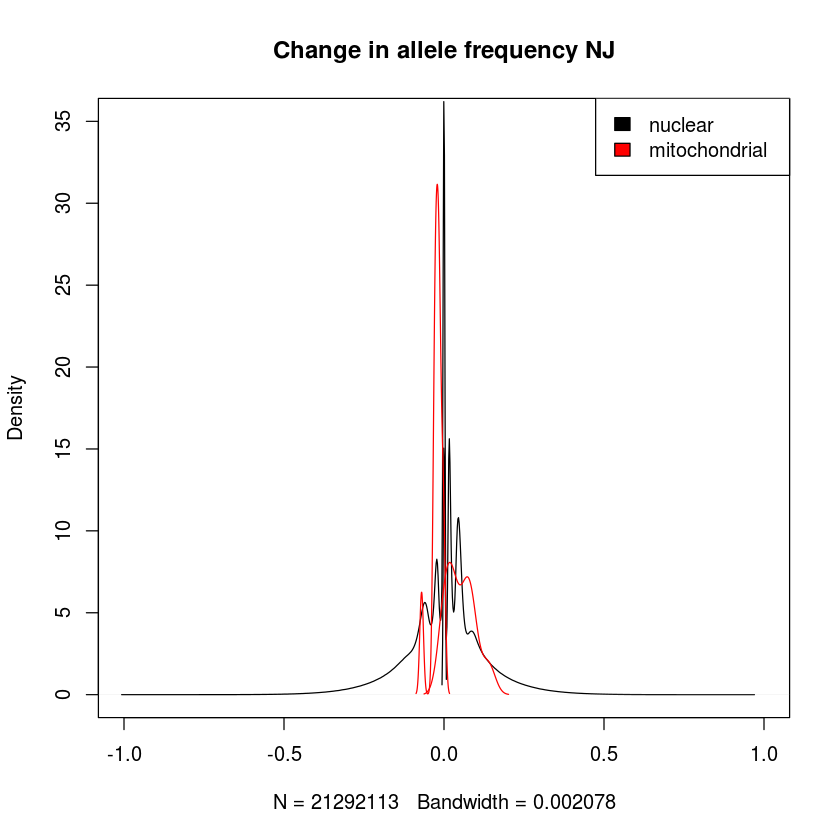

In [13]:
plot(density(njeunuc$diff), main="Change in allele frequency NJ", xlim=c(-1,1), ylim=c(0, 35))
    lines(density(njeunucn$diff), col="black") 
    lines(density(AAPE02072785nj$diff), col="red") 
    lines(density(AAPE02072785njn$diff), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

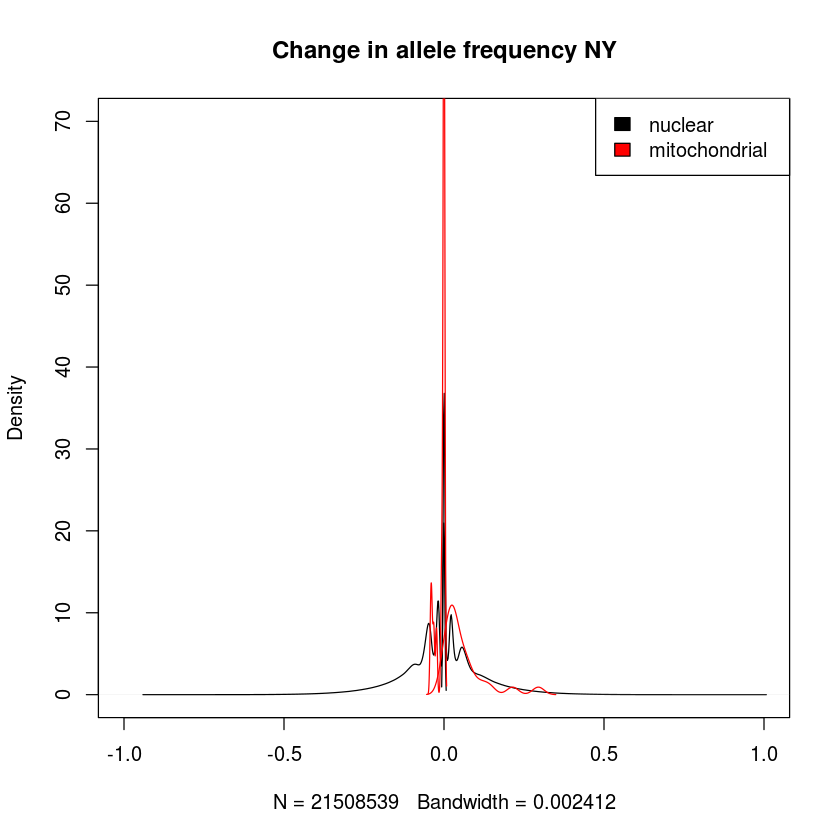

In [22]:
plot(density(nyeunuc$diff), main="Change in allele frequency NY", xlim=c(-1,1), ylim=c(0, 70))
    lines(density(nyeunucn$diff), col="black") 
    lines(density(AAPE02072785ny$diff), col="red") 
    lines(density(AAPE02072785nyn$diff), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

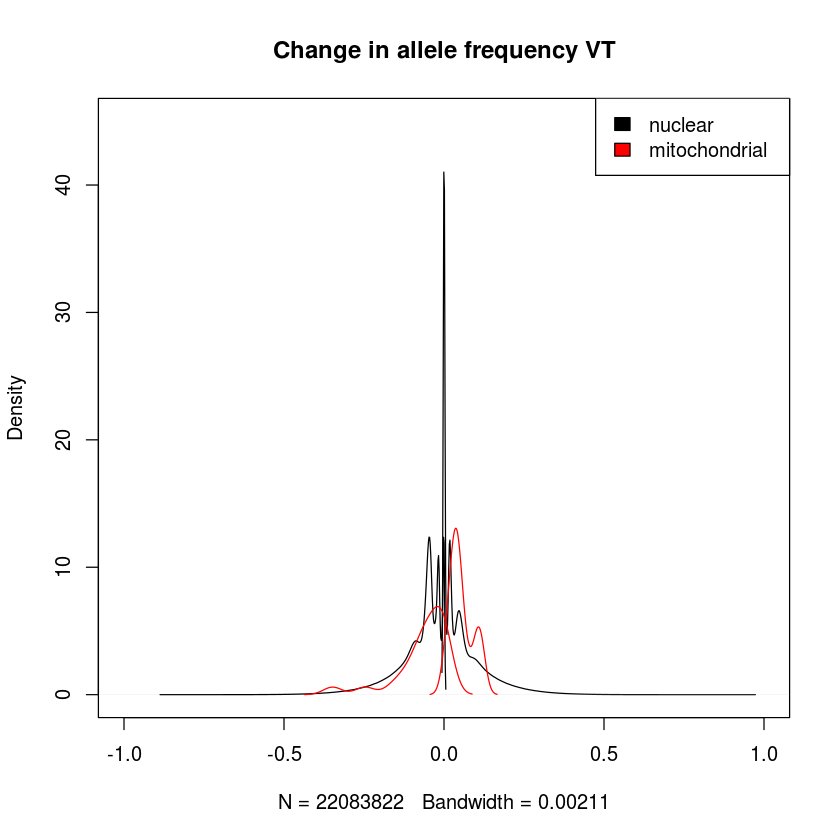

In [17]:
plot(density(vteunuc$diff), main="Change in allele frequency VT", xlim=c(-1,1), ylim=c(0, 45))
    lines(density(vteunucn$diff), col="black") 
    lines(density(AAPE02072785vt$diff), col="red") 
    lines(density(AAPE02072785vtn$diff), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

#  Actual change in MAF vs simulated change

I have tried simulations with multiple ne values, tryng to get better approximations of drift. 

I realized though some of this drift in the whole genome might be artifacts... So try filtering the actual change in maf.  



In [2]:
njsim=fread("~/WGS/SNPS/All_mylu/snps/NJ_f1f2Ne424_370_296.csv")
nysim=fread("~/WGS/SNPS/All_mylu/snps/NY_f1f2Ne424_370_296.csv")
vtsim=fread("~/WGS/SNPS/All_mylu/snps/VT_f1f2Ne424_370_296.csv")

Read 93000000 rows and 4 (of 4) columns from 3.914 GB file in 00:05:14
Read 93000000 rows and 4 (of 4) columns from 4.043 GB file in 00:02:27
Read 93000000 rows and 4 (of 4) columns from 3.999 GB file in 00:02:32


Work on trying to get error distributions around the f2 values.

For each snp, fit the beta distribution to the bootstrapped  f1 maf.  

In [5]:
head(njsim, 101)

V1,f1,f2,SNP
1,0.316038,0.2533784,10265656
2,0.399973,0.4020270,10265656
3,0.291674,0.3344595,10265656
4,0.557841,0.5337838,10265656
5,0.385794,0.3851351,10265656
6,0.469169,0.4425676,10265656
7,0.469964,0.4729730,10265656
8,0.529228,0.5608108,10265656
9,0.343525,0.4256757,10265656
10,0.384868,0.3648649,10265656


In [34]:
njsim2=fread("~/WGS/SNPS/All_mylu/snps/NJ_f1f2Ne100_80_40.csv")
nysim2=fread("~/WGS/SNPS/All_mylu/snps/NY_f1f2Ne100_80_40.csv")
vtsim2=fread("~/WGS/SNPS/All_mylu/snps/VT_f1f2Ne100_80_40.csv")

Read 93000000 rows and 4 (of 4) columns from 2.930 GB file in 00:01:22
Read 93000000 rows and 4 (of 4) columns from 2.985 GB file in 00:01:14
Read 93000000 rows and 4 (of 4) columns from 2.963 GB file in 00:01:17


In [ ]:
100_80_40

In [35]:
njsim2$diff=njsim2$f2-njsim2$f1
nysim2$diff=nysim2$f2-nysim2$f1
vtsim2$diff=vtsim2$f2-vtsim2$f1

In [10]:
njsimsnps=njsim[njsim$diff>0,]
nysimsnps=nysim[nysim$diff>0,]
vtsimsnps=vtsim[vtsim$diff>0,]
njsimneg=njsim[njsim$diff<0,]
nysimneg=nysim[nysim$diff<0,]
vtsimneg=vtsim[vtsim$diff<0,]

In [ ]:
hist(~tl,data=ChinookArg,xlab="Total Length (cm)",breaks=seq(-1,0.1,1))

In [ ]:
a=hist(njeusnpsAllfilt$diff, plot=F, breaks=15)
s=hist(njsim$diff, plot=F, breaks=5)
    plot( a, col=rgb(0,0,1,1/4), xlim=c(-1,1.1), ylim=c(0, 2.5e+07), main=c("NJ \n Ne=354") ) 
    plot( s, col=rgb(1,0,0,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

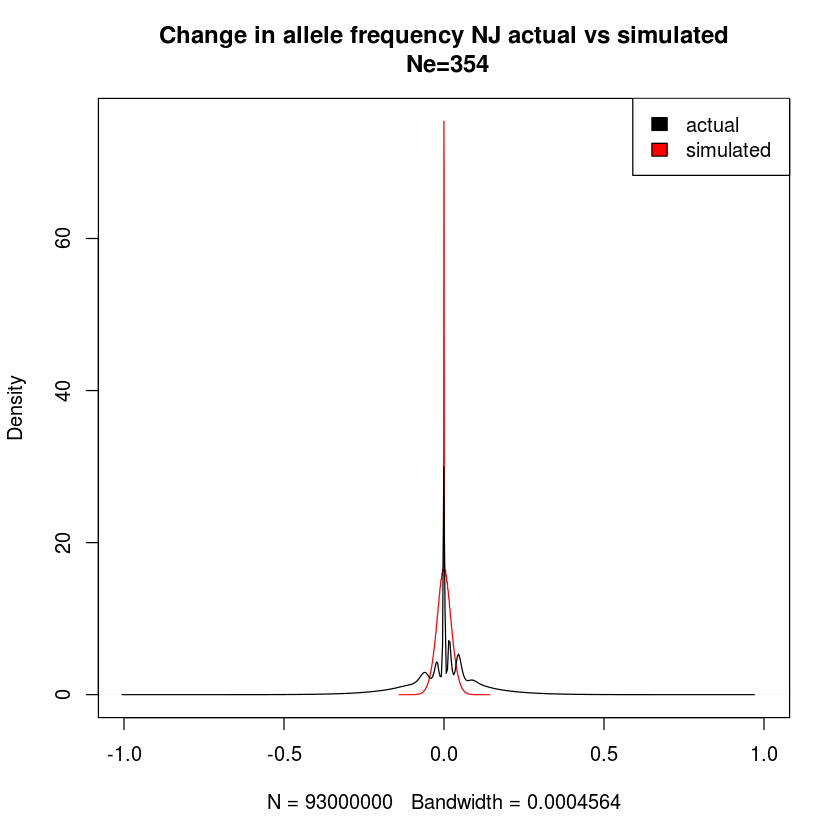

In [58]:
plot(density(njsim$diff), col="red", main=" Change in allele frequency NJ actual vs simulated \n Ne=354", xlim=c(-1,1))
    lines(density(njeusnpsAllfilt$diff)) 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

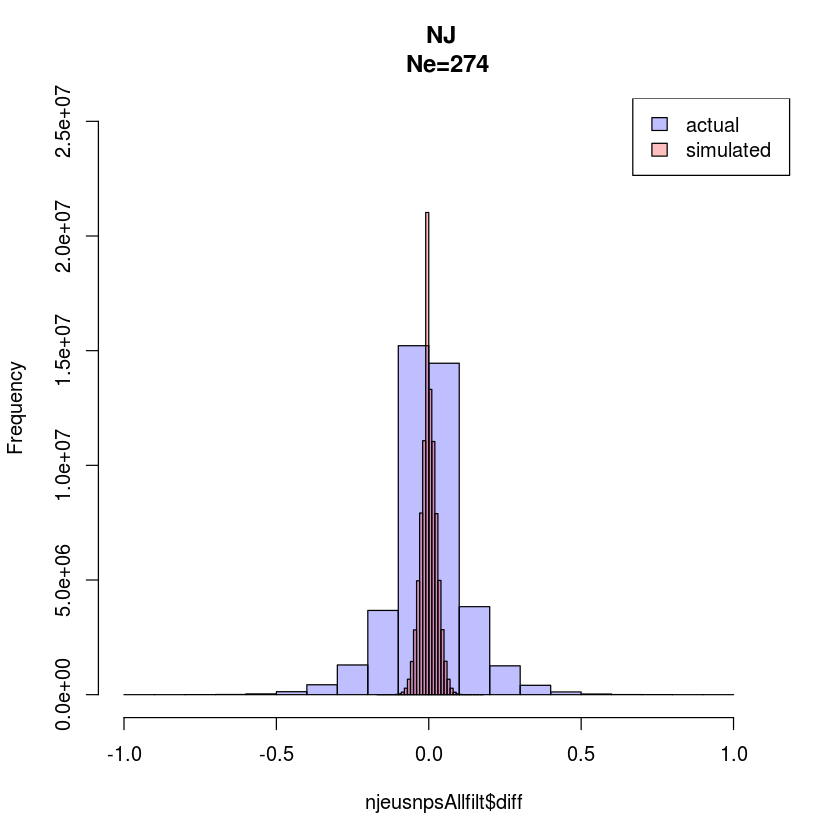

In [14]:
a=hist(njeusnpsAllfilt$diff, plot=F)
s=hist(njsim$diff, plot=F)
    plot( a, col=rgb(0,0,1,1/4), xlim=c(-1,1.1), ylim=c(0, 2.5e+07), main=c("NJ \n Ne=274") ) 
    plot( s, col=rgb(1,0,0,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

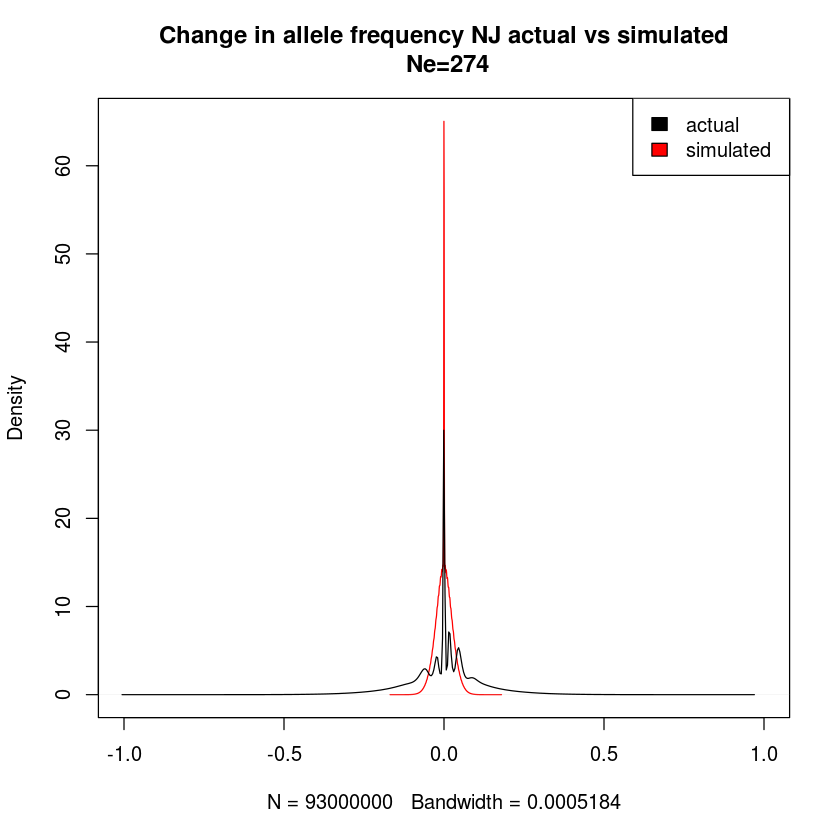

In [15]:
plot(density(njsim$diff), col="red", main=" Change in allele frequency NJ actual vs simulated \n Ne=274", xlim=c(-1,1))
    lines(density(njeusnpsAllfilt$diff)) 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

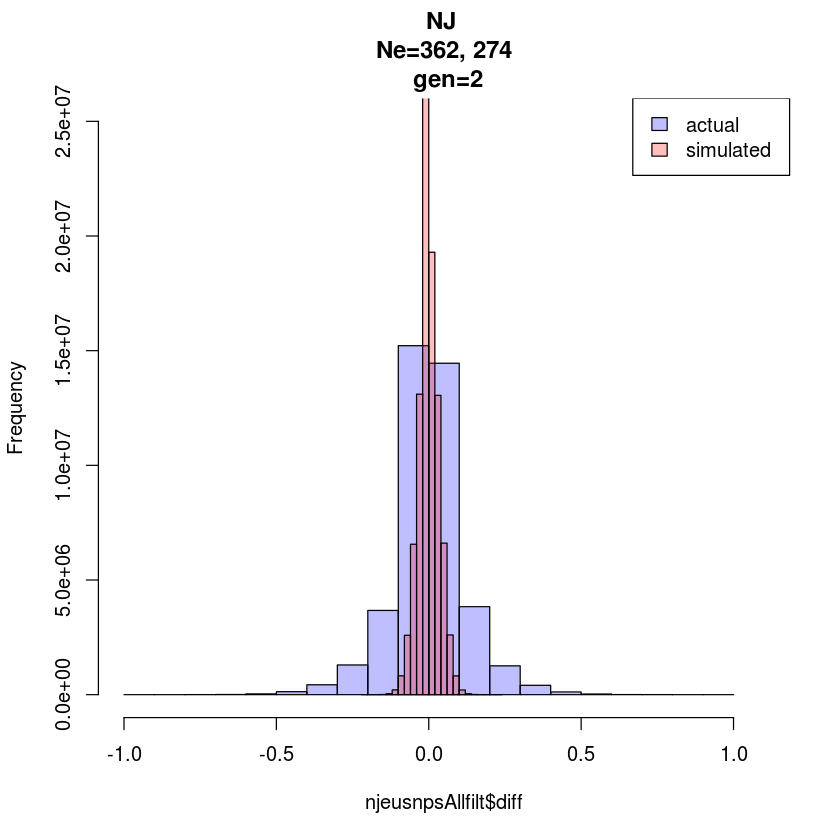

In [8]:
a=hist(njeusnpsAllfilt$diff, plot=F)
s=hist(njsim$diff, plot=F)
    plot( a, col=rgb(0,0,1,1/4), xlim=c(-1,1.1), ylim=c(0, 2.5e+07), main=c("NJ \n Ne=362, 274 \n gen=2") ) 
    plot( s, col=rgb(1,0,0,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

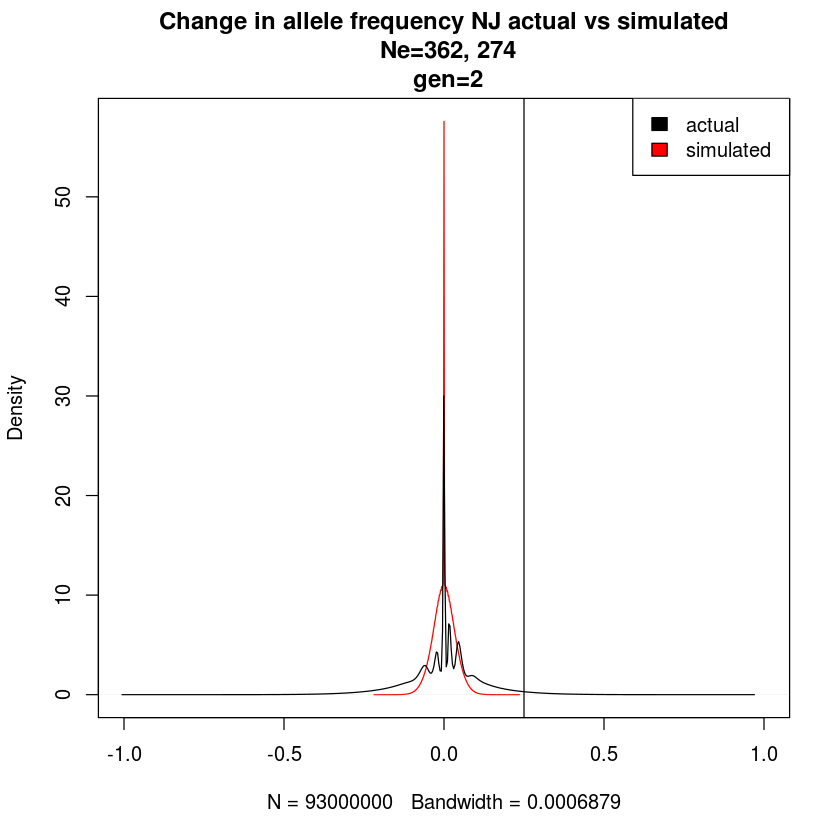

In [26]:
plot(density(njsim2$diff), col="red", main=" Change in allele frequency NJ actual vs simulated \n  Ne=362, 274 \n gen=2", xlim=c(-1,1))
    lines(density(njeusnpsAllfilt$diff)) 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))
abline(v=0.25)

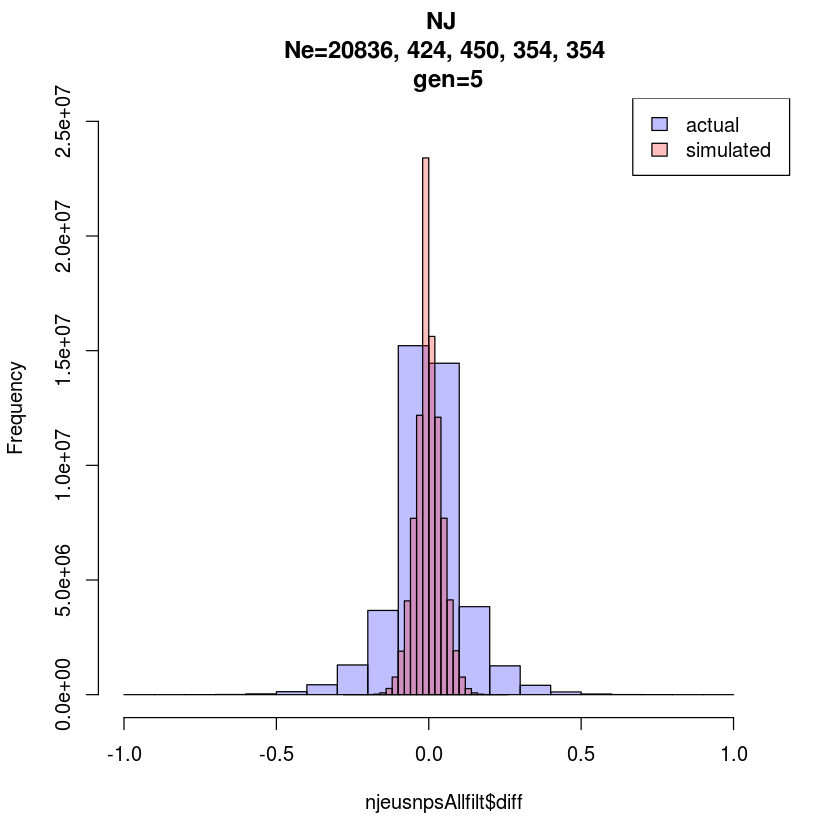

In [18]:
a=hist(njeusnpsAllfilt$diff, plot=F)
s=hist(njsim$diff, plot=F)
    plot( a, col=rgb(0,0,1,1/4), xlim=c(-1,1.1), ylim=c(0, 2.5e+07), main=c("NJ \n Ne=20836, 424, 450, 354, 354 \n gen=5") ) 
    plot( s, col=rgb(1,0,0,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

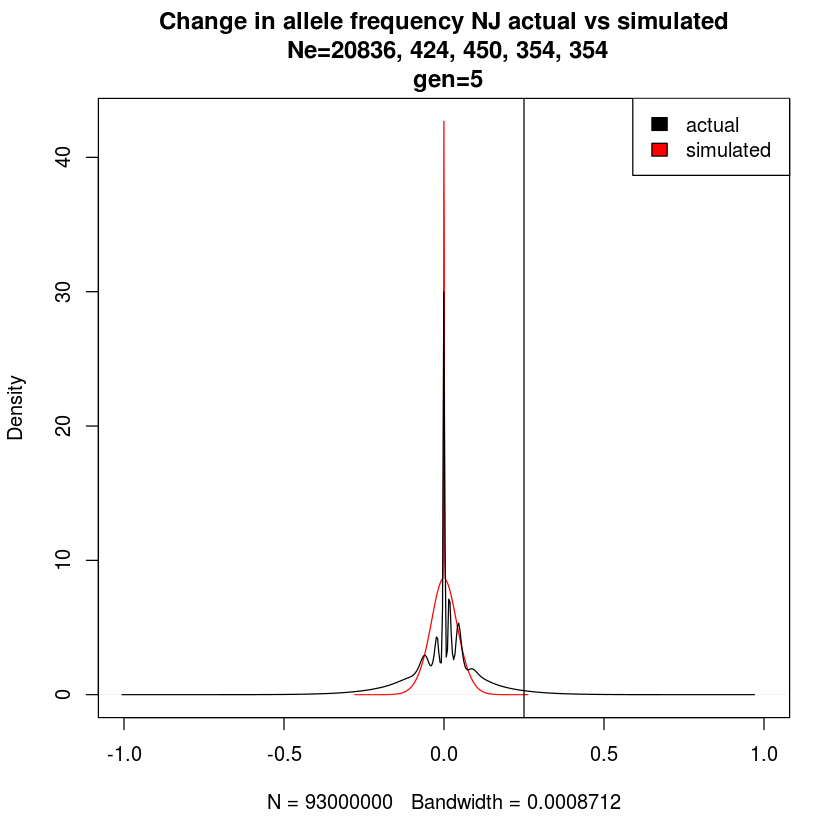

In [23]:
plot(density(njsim$diff), col="red", main=" Change in allele frequency NJ actual vs simulated \n  Ne=20836, 424, 450, 354, 354 \n gen=5", xlim=c(-1,1))
    lines(density(njeusnpsAllfilt$diff)) 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))
abline(v=0.25)

In [ ]:
a=hist(njeusnpsAllfilt$diff, plot=F, breaks=15)
s=hist(njsim$diff, plot=F, breaks=5)
    plot( a, col=rgb(0,0,1,1/4), xlim=c(-1,1.1), ylim=c(0, 2.5e+07), main=c("NJ \n Ne=20836, 450, 354 \n gen=3") ) 
    plot( s, col=rgb(1,0,0,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

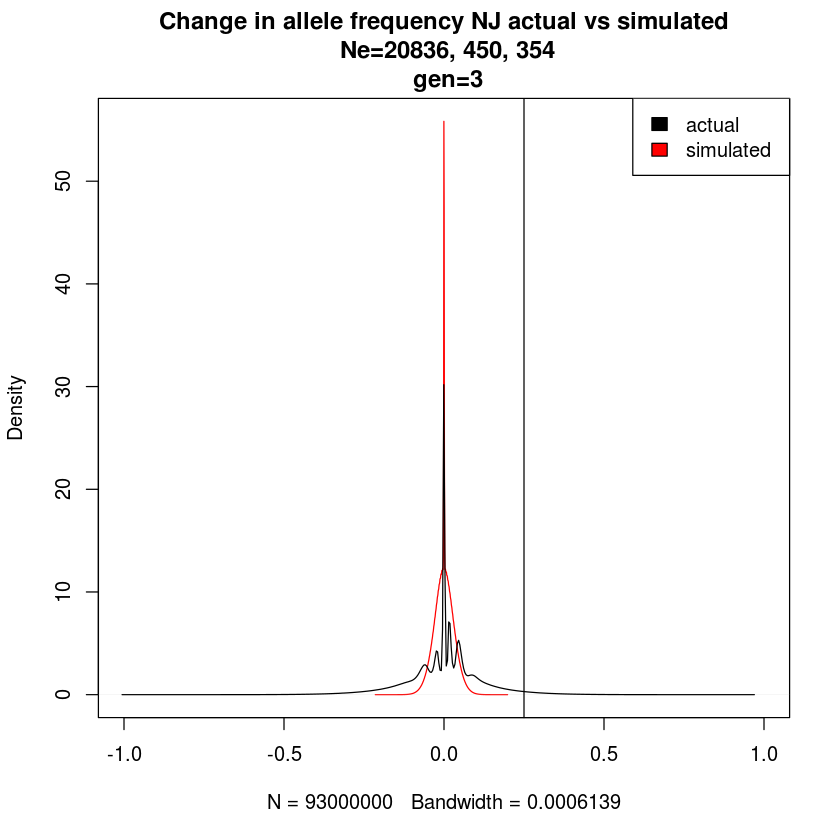

In [10]:
plot(density(njsim$diff), col="red", main=" Change in allele frequency NJ actual vs simulated \n  Ne=20836, 450, 354 \n gen=3", xlim=c(-1,1))
    lines(density(njeusnpsAllfilt$diff)) 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))
abline(v=0.25)

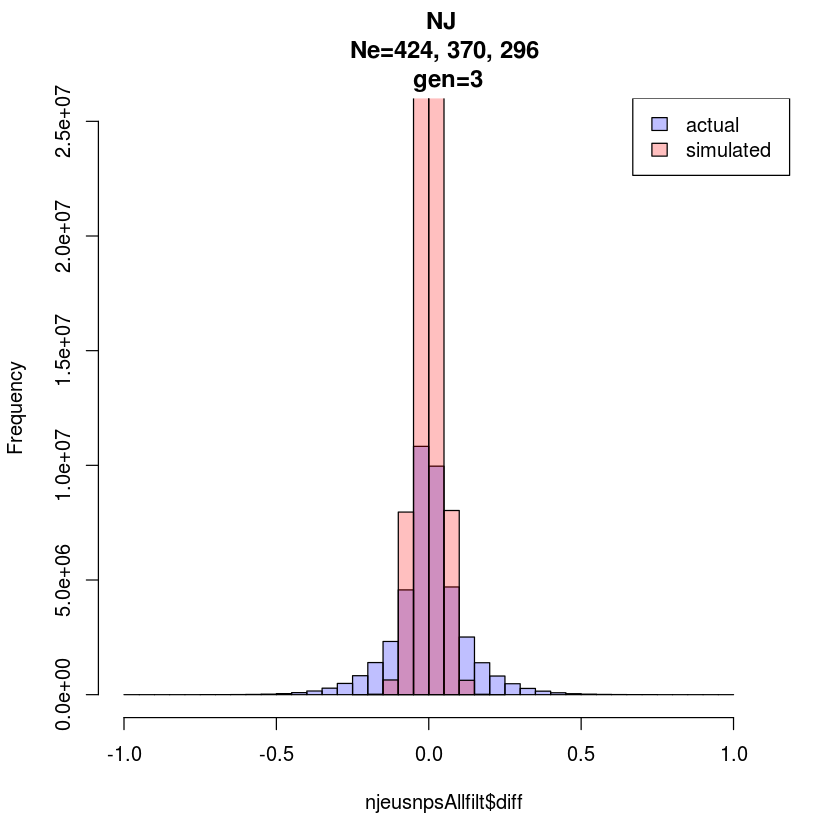

In [28]:
a=hist(njeusnpsAllfilt$diff, plot=F, breaks=30)
s=hist(njsim$diff, plot=F, breaks=7)
    plot( a, col=rgb(0,0,1,1/4), xlim=c(-1,1.1), ylim=c(0, 2.5e+07), main=c("NJ \n Ne=424, 370, 296 \n gen=3") ) 
    plot( s, col=rgb(1,0,0,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

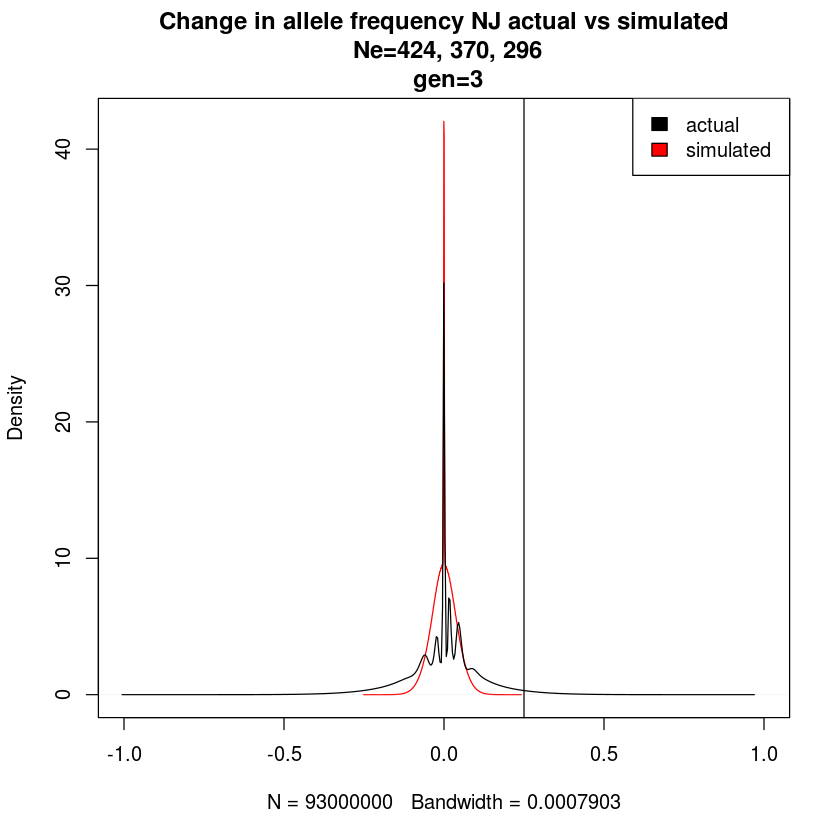

In [14]:
plot(density(njsim$diff), col="red", main=" Change in allele frequency NJ actual vs simulated \n  Ne=424, 370, 296 \n gen=3", xlim=c(-1,1))
    lines(density(njeusnpsAllfilt$diff)) 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

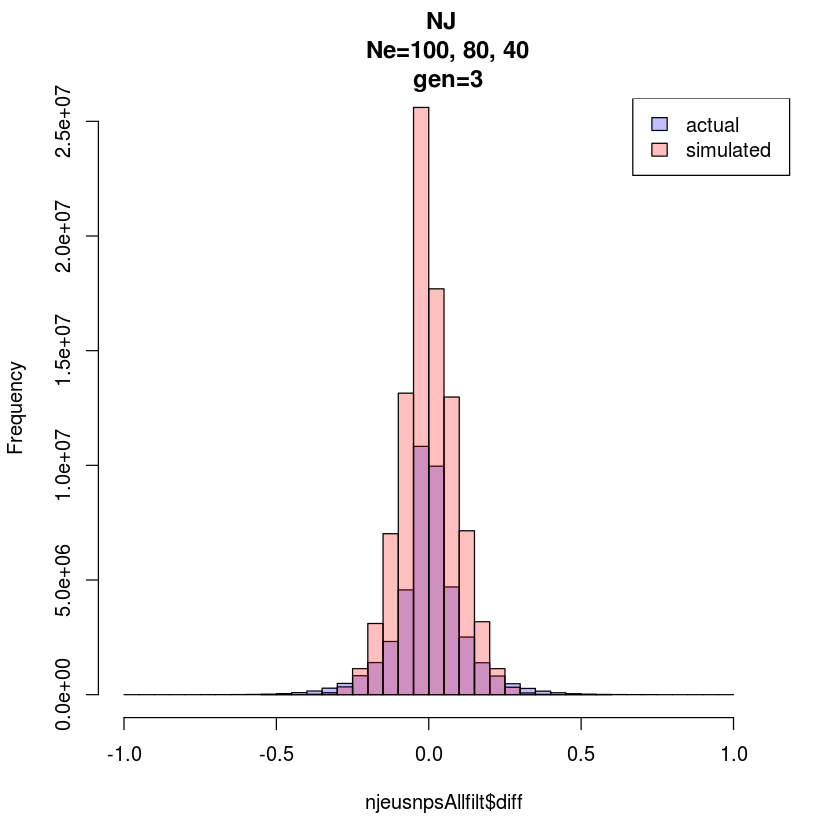

In [41]:
a=hist(njeusnpsAllfilt$diff, plot=F, breaks=30)
s=hist(njsim2$diff, plot=F, breaks=20)
    plot( a, col=rgb(0,0,1,1/4), xlim=c(-1,1.1), ylim=c(0, 2.5e+07), main=c("NJ \n Ne=100, 80, 40\n gen=3") ) 
    plot( s, col=rgb(1,0,0,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

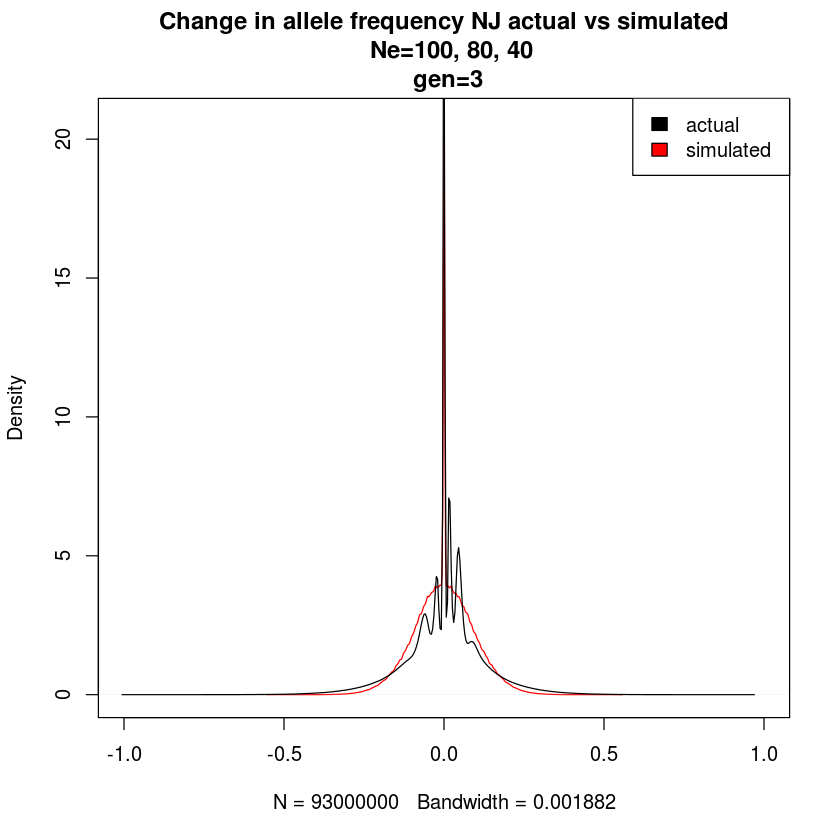

In [37]:
plot(density(njsim2$diff), col="red", main=" Change in allele frequency NJ actual vs simulated \n  Ne=100, 80, 40\n gen=3", xlim=c(-1,1))
    lines(density(njeusnpsAllfilt$diff)) 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

In [ ]:
100_80_40

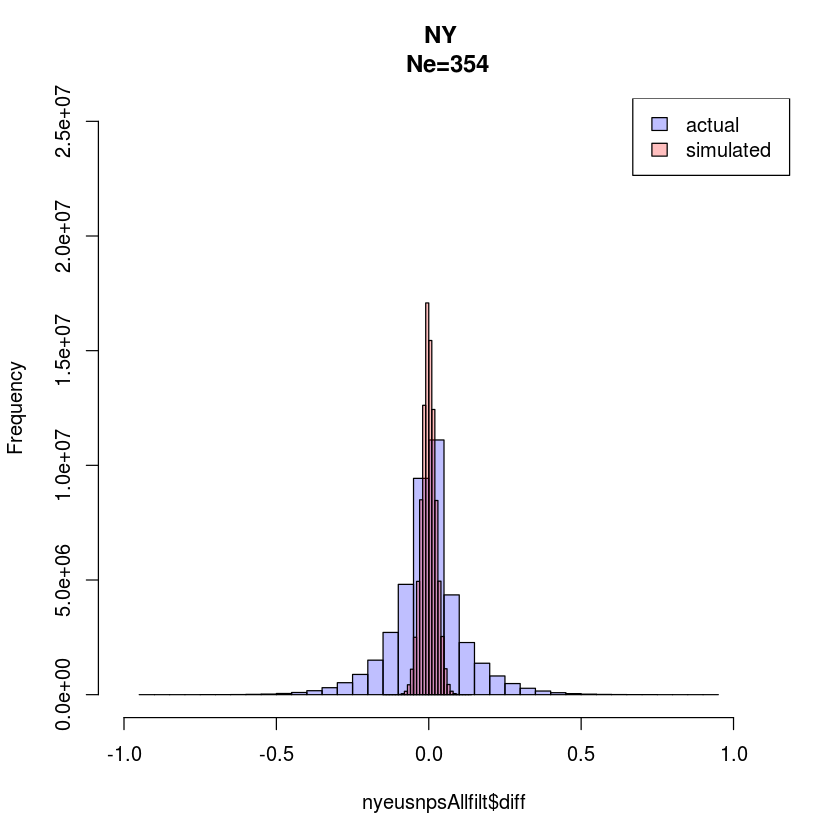

In [54]:
a=hist(nyeusnpsAllfilt$diff, plot=F)
s=hist(nysim$diff, plot=F)
    plot( a, col=rgb(0,0,1,1/4), xlim=c(-1,1.1), ylim=c(0, 2.5e+07), main=c("NY \n Ne=354") ) 
    plot( s, col=rgb(1,0,0,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

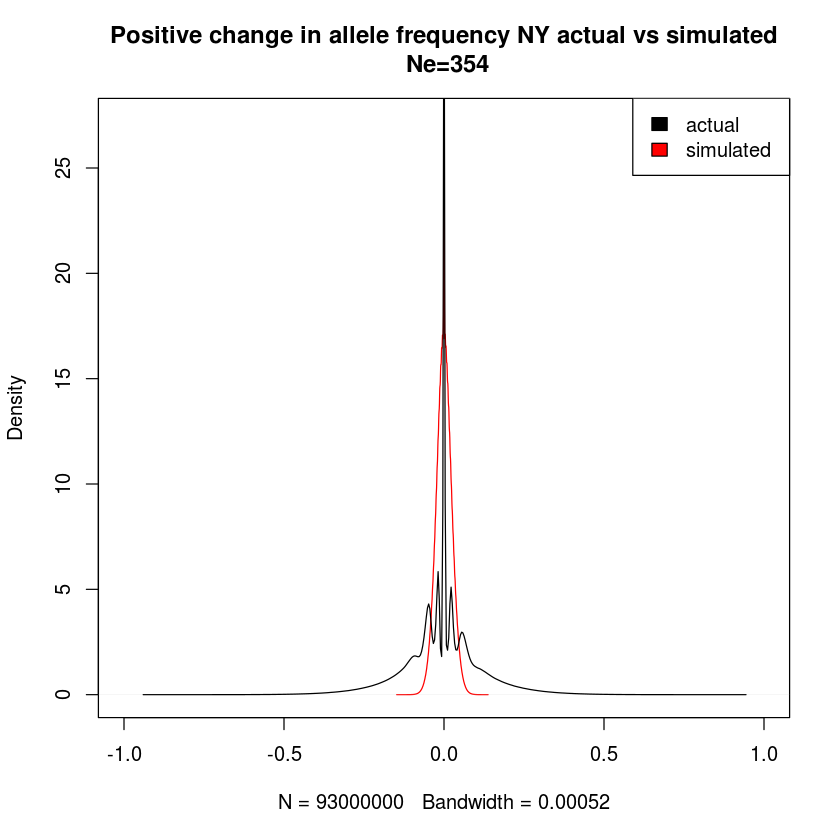

In [57]:
plot(density(nysim$diff), col="red", main=" Positive change in allele frequency NY actual vs simulated \n Ne=354", xlim=c(-1,1))
    lines(density(nyeusnpsAllfilt$diff)) 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

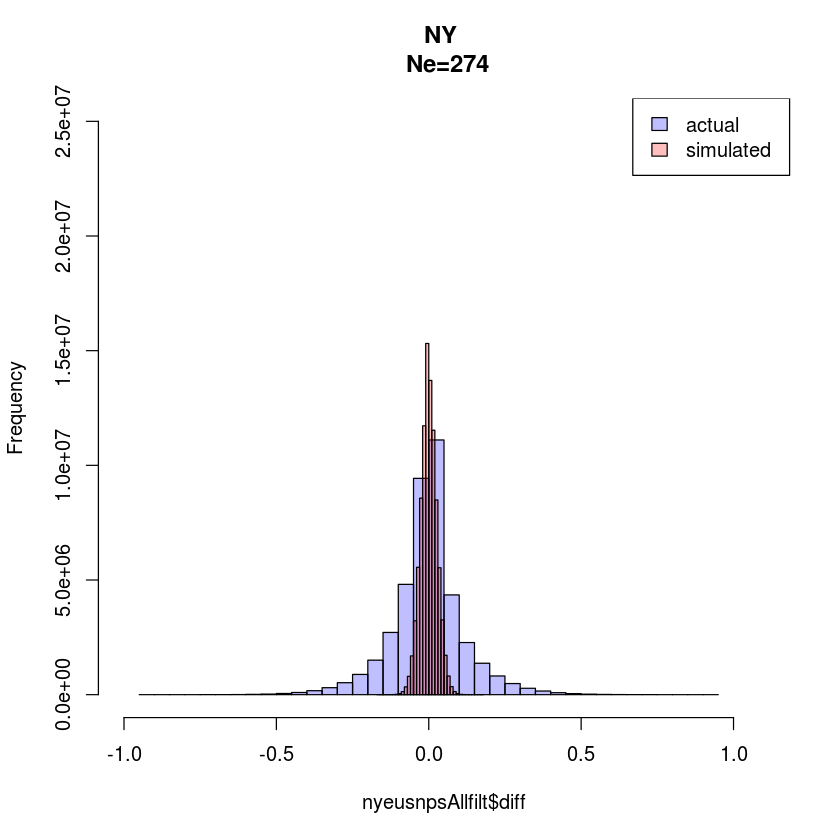

In [16]:
a=hist(nyeusnpsAllfilt$diff, plot=F)
s=hist(nysim$diff, plot=F)
    plot( a, col=rgb(0,0,1,1/4), xlim=c(-1,1.1), ylim=c(0, 2.5e+07), main=c("NY \n Ne=274") ) 
    plot( s, col=rgb(1,0,0,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

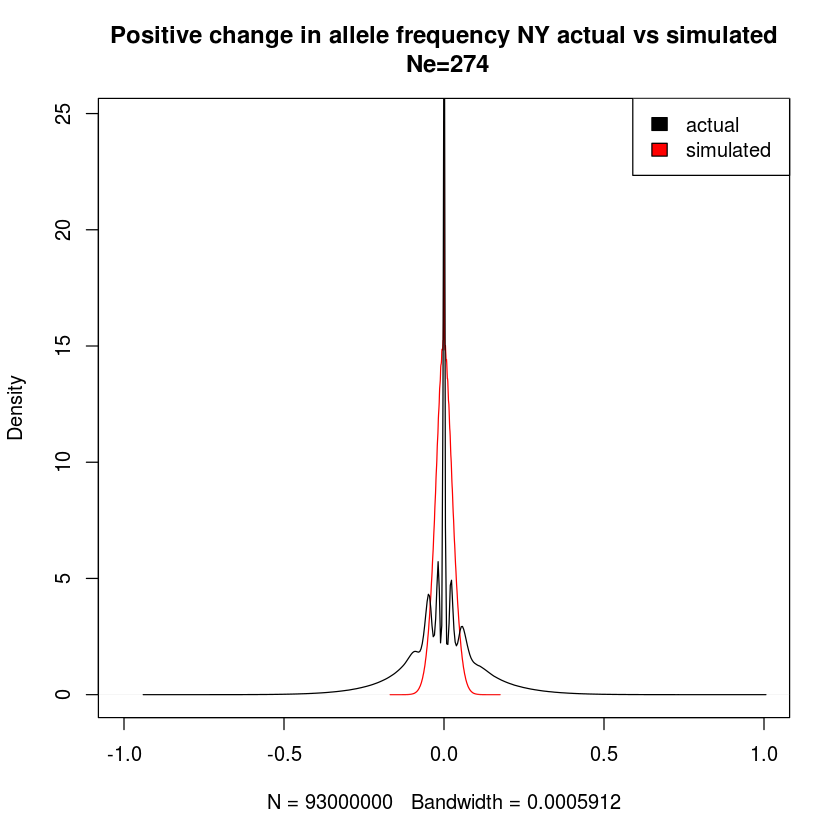

In [11]:
plot(density(nysim$diff), col="red", main=" change in allele frequency NY actual vs simulated \n Ne=274", xlim=c(-1,1))
    lines(density(nyeusnpsAllfilt$diff)) 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

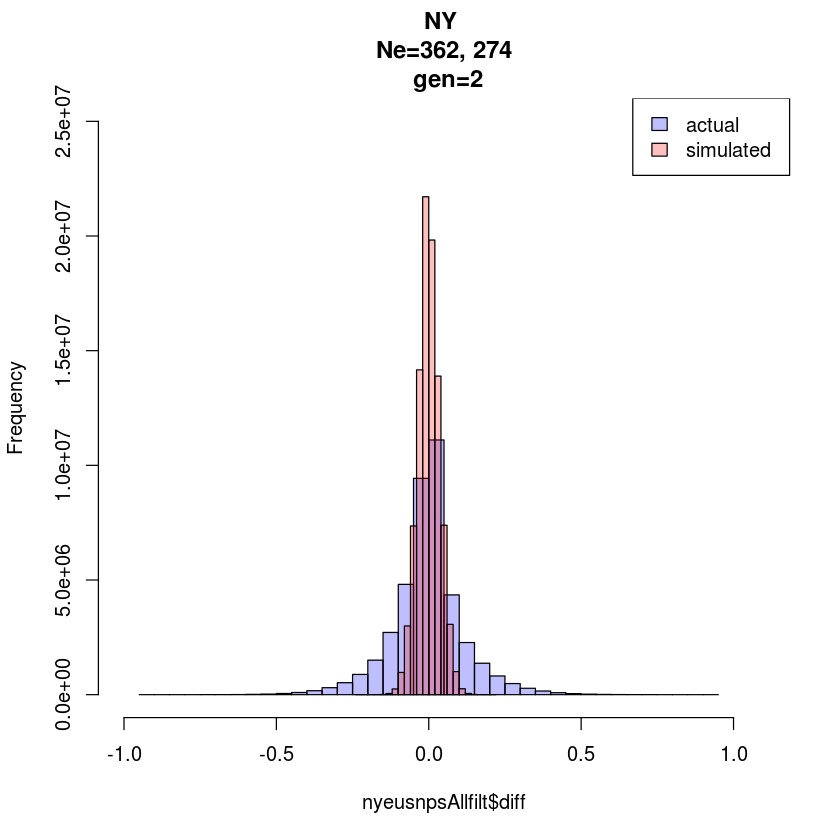

In [10]:
a=hist(nyeusnpsAllfilt$diff, plot=F)
s=hist(nysim$diff, plot=F)
    plot( a, col=rgb(0,0,1,1/4), xlim=c(-1,1.1), ylim=c(0, 2.5e+07), main=c("NY \n Ne=362, 274 \n gen=2") ) 
    plot( s, col=rgb(1,0,0,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

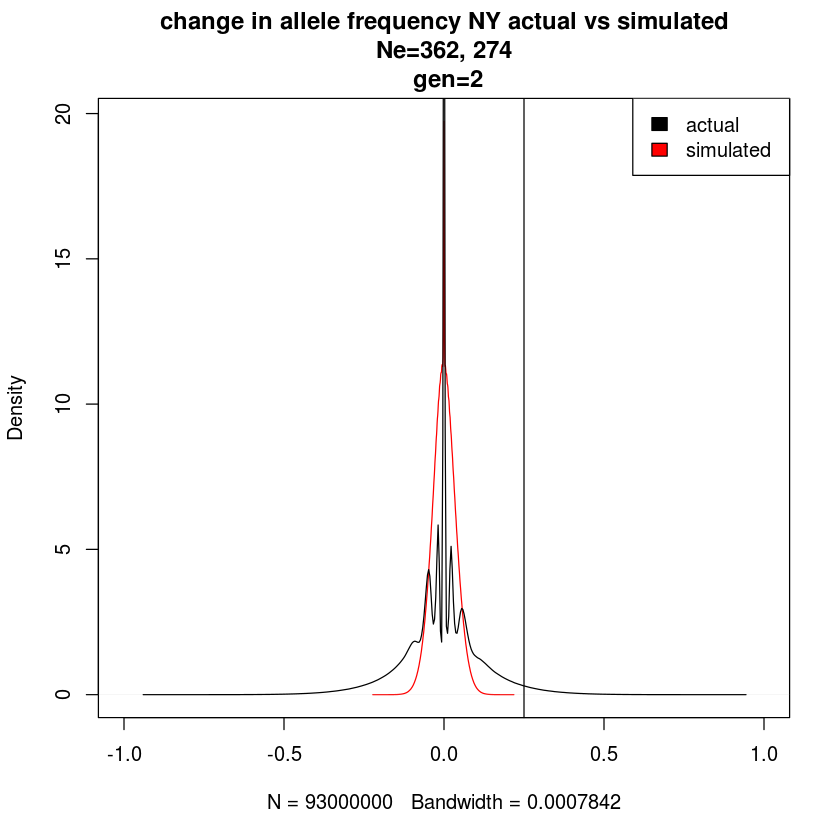

In [27]:
plot(density(nysim2$diff), col="red", main=" change in allele frequency NY actual vs simulated \n Ne=362, 274 \n gen=2", xlim=c(-1,1))
    lines(density(nyeusnpsAllfilt$diff)) 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))
abline(v=0.25)

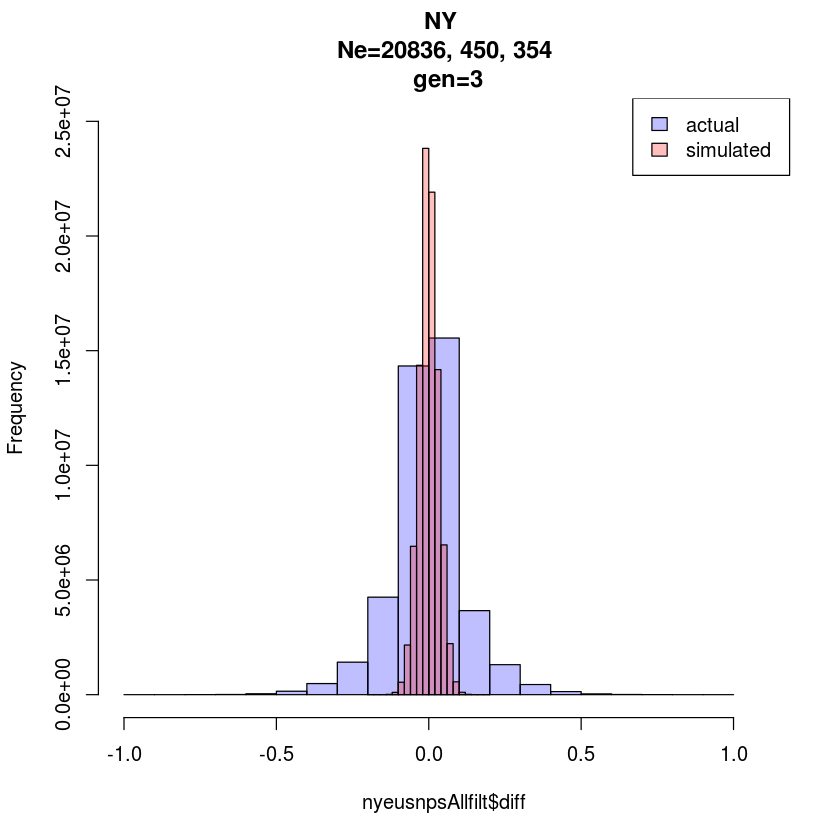

In [11]:
a=hist(nyeusnpsAllfilt$diff, plot=F)
s=hist(nysim$diff, plot=F)
    plot( a, col=rgb(0,0,1,1/4), xlim=c(-1,1.1), ylim=c(0, 2.5e+07), main=c("NY \n Ne=20836, 450, 354 \n gen=3") ) 
    plot( s, col=rgb(1,0,0,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

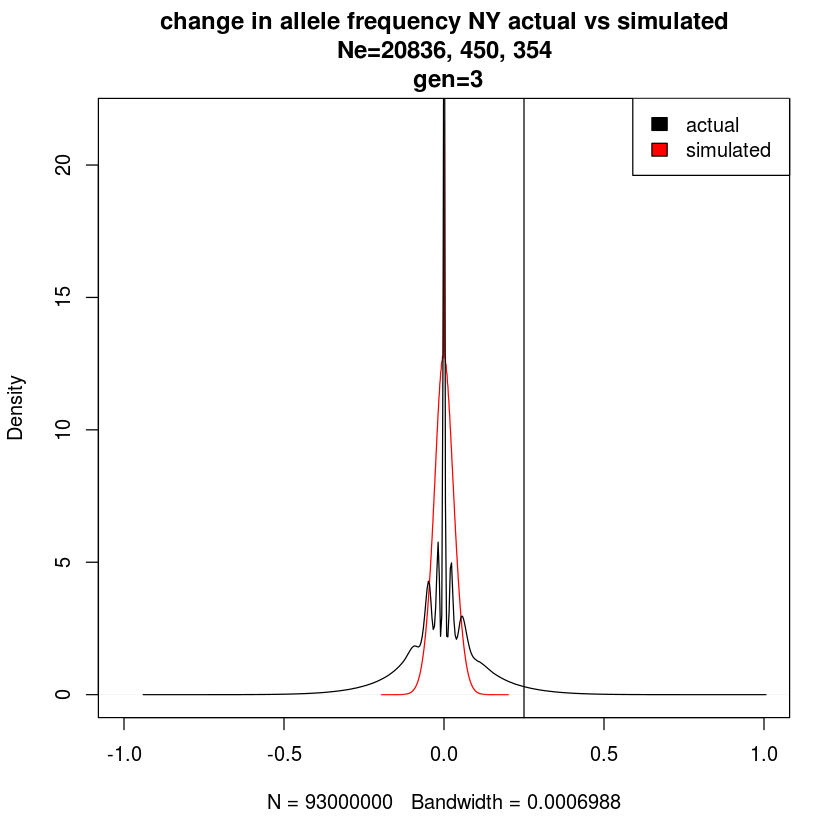

In [13]:
plot(density(nysim$diff), col="red", main=" change in allele frequency NY actual vs simulated \n Ne=20836, 450, 354 \n gen=3", xlim=c(-1,1))
    lines(density(nyeusnpsAllfilt$diff)) 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))
abline(v=0.25)

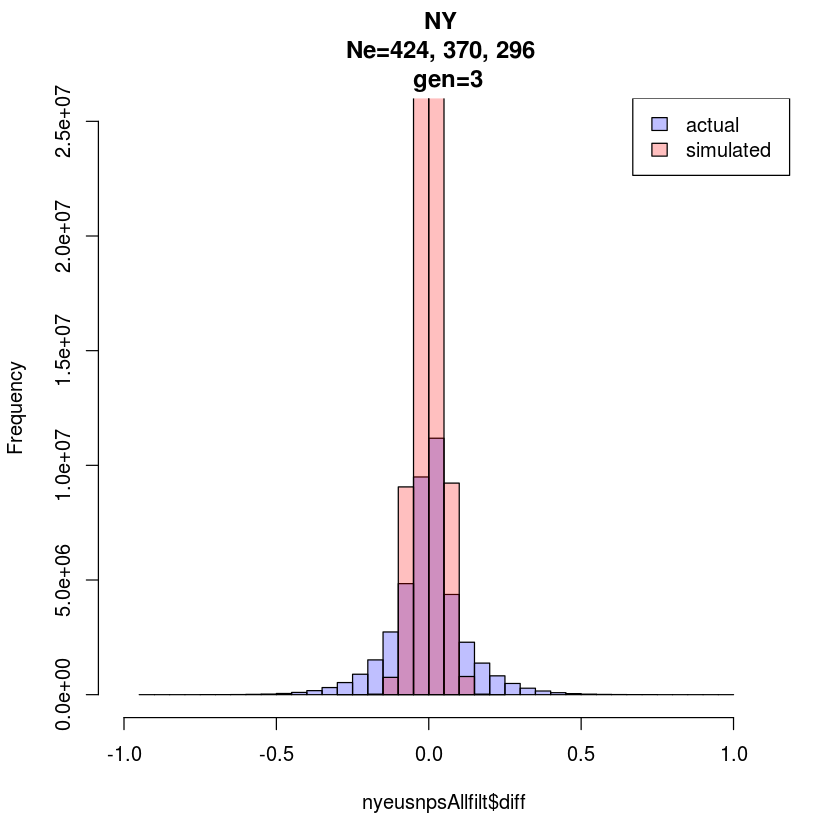

In [32]:
a=hist(nyeusnpsAllfilt$diff, plot=F, breaks=30)
s=hist(nysim$diff, plot=F, breaks=9)
    plot( a, col=rgb(0,0,1,1/4), xlim=c(-1,1.1), ylim=c(0, 2.5e+07), main=c("NY \n Ne=424, 370, 296  \n gen=3") ) 
    plot( s, col=rgb(1,0,0,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

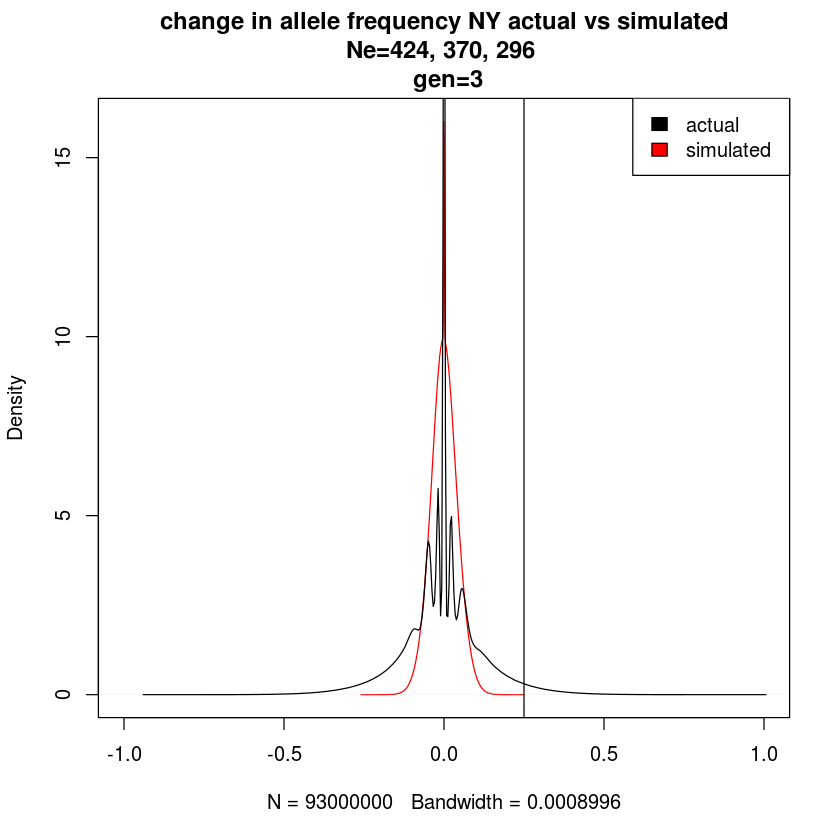

In [16]:
plot(density(nysim$diff), col="red", main=" change in allele frequency NY actual vs simulated \n Ne=424, 370, 296  \n gen=3", xlim=c(-1,1))
    lines(density(nyeusnpsAllfilt$diff)) 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))
abline(v=0.25)

In [ ]:
424, 370, 296 

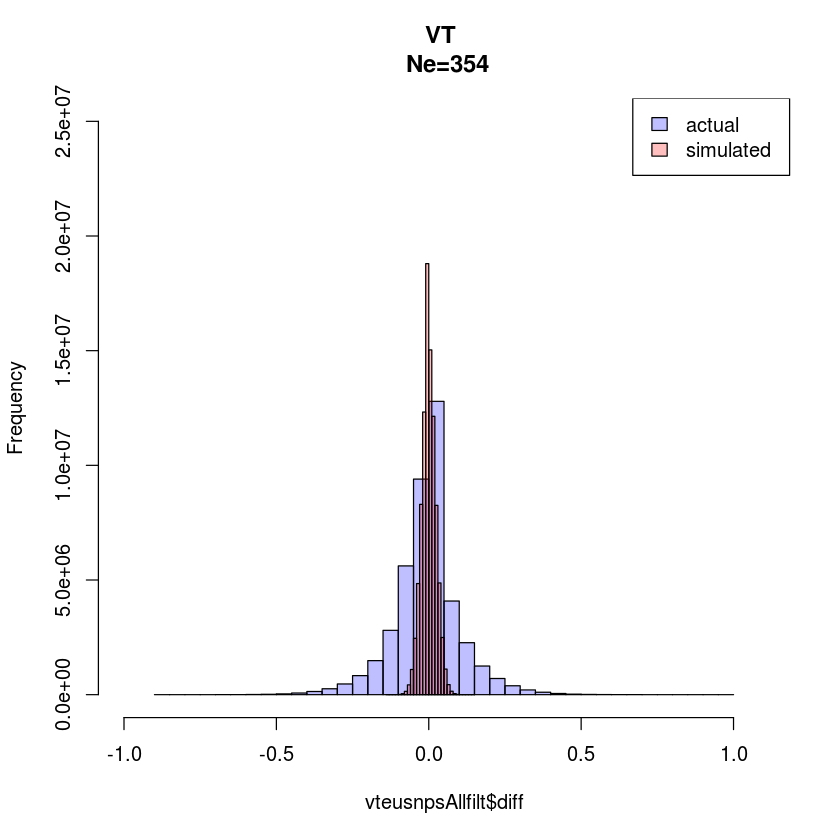

In [55]:
a=hist(vteusnpsAllfilt$diff, plot=F)
s=hist(vtsim$diff, plot=F)
    plot( a, col=rgb(0,0,1,1/4), xlim=c(-1,1.1), ylim=c(0, 2.5e+07), main=c("VT \n Ne=354") ) 
    plot( s, col=rgb(1,0,0,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

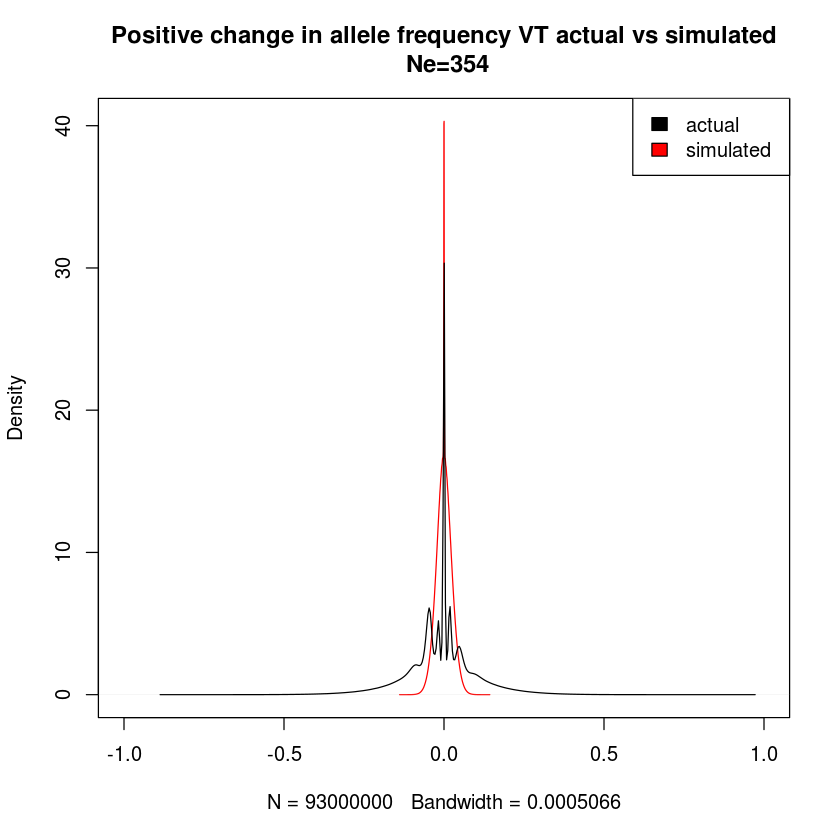

In [56]:
plot(density(vtsim$diff), col="red", main=" Positive change in allele frequency VT actual vs simulated \n Ne=354", xlim=c(-1,1))
     lines(density(vteusnpsAllfilt$diff)) 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

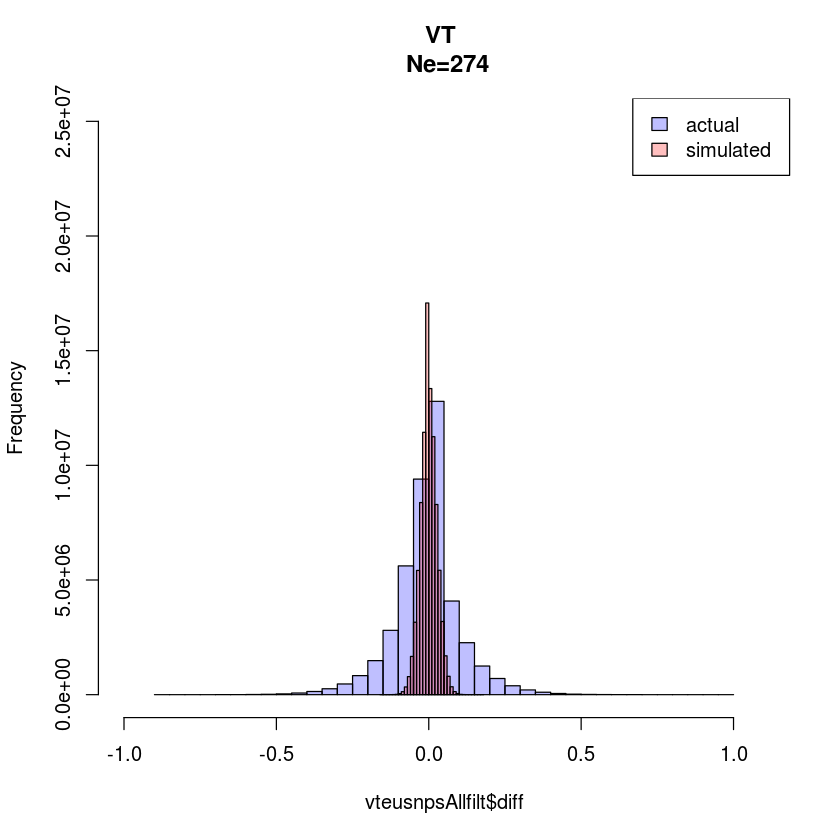

In [17]:
a=hist(vteusnpsAllfilt$diff, plot=F)
s=hist(vtsim$diff, plot=F)
    plot( a, col=rgb(0,0,1,1/4), xlim=c(-1,1.1), ylim=c(0, 2.5e+07), main=c("VT \n Ne=274") ) 
    plot( s, col=rgb(1,0,0,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

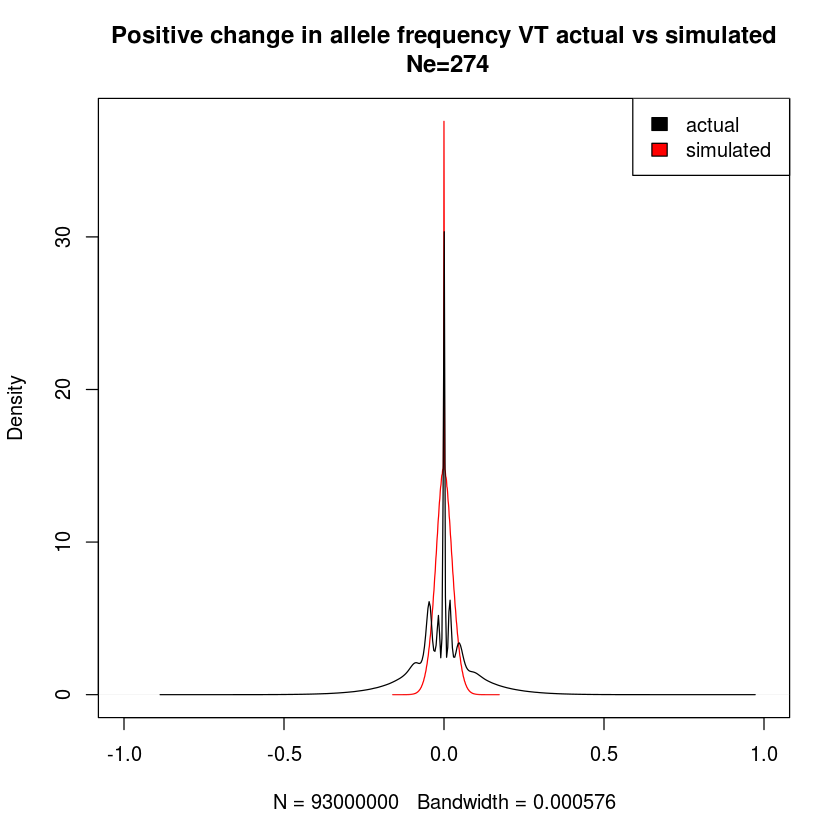

In [18]:
plot(density(vtsim$diff), col="red", main=" Positive change in allele frequency VT actual vs simulated \n Ne=274", xlim=c(-1,1))
     lines(density(vteusnpsAllfilt$diff)) 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

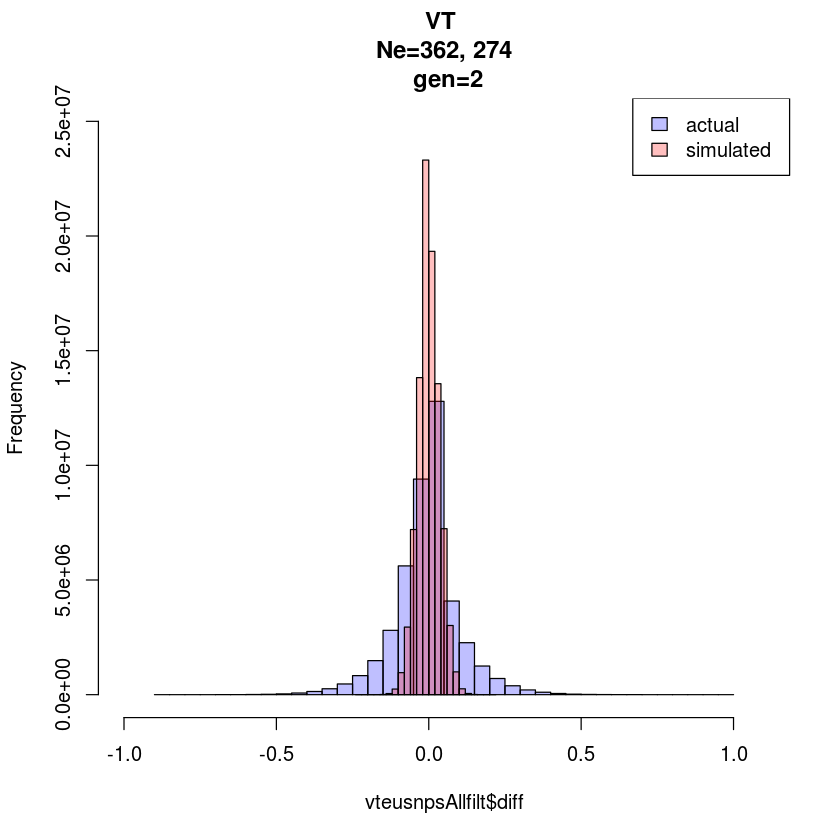

In [12]:
a=hist(vteusnpsAllfilt$diff, plot=F)
s=hist(vtsim$diff, plot=F)
    plot( a, col=rgb(0,0,1,1/4), xlim=c(-1,1.1), ylim=c(0, 2.5e+07), main=c("VT \n Ne=362, 274 \n gen=2") ) 
    plot( s, col=rgb(1,0,0,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

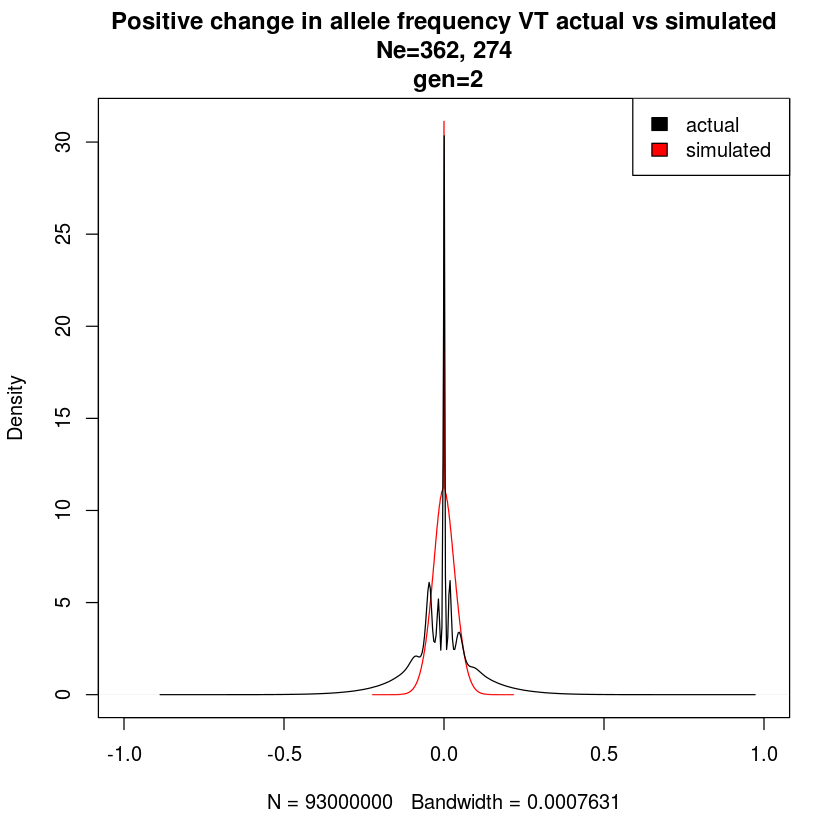

In [13]:
plot(density(vtsim$diff), col="red", main=" Positive change in allele frequency VT actual vs simulated \n Ne=362, 274 \n gen=2", xlim=c(-1,1))
     lines(density(vteusnpsAllfilt$diff)) 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

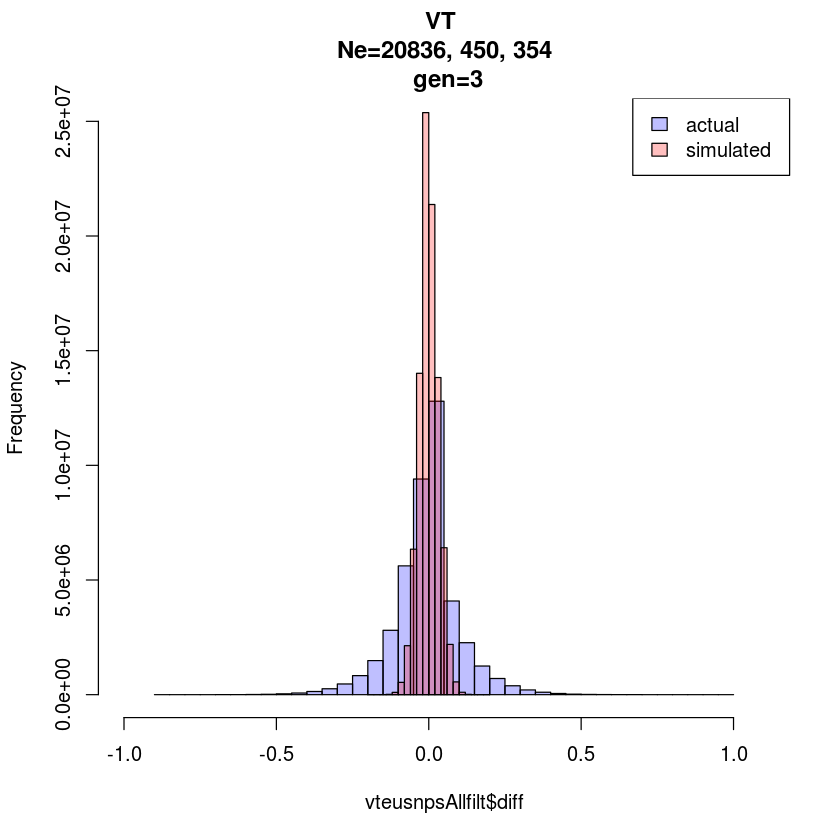

In [14]:
a=hist(vteusnpsAllfilt$diff, plot=F)
s=hist(vtsim$diff, plot=F)
    plot( a, col=rgb(0,0,1,1/4), xlim=c(-1,1.1), ylim=c(0, 2.5e+07), main=c("VT \n Ne=20836, 450, 354 \n gen=3") ) 
    plot( s, col=rgb(1,0,0,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

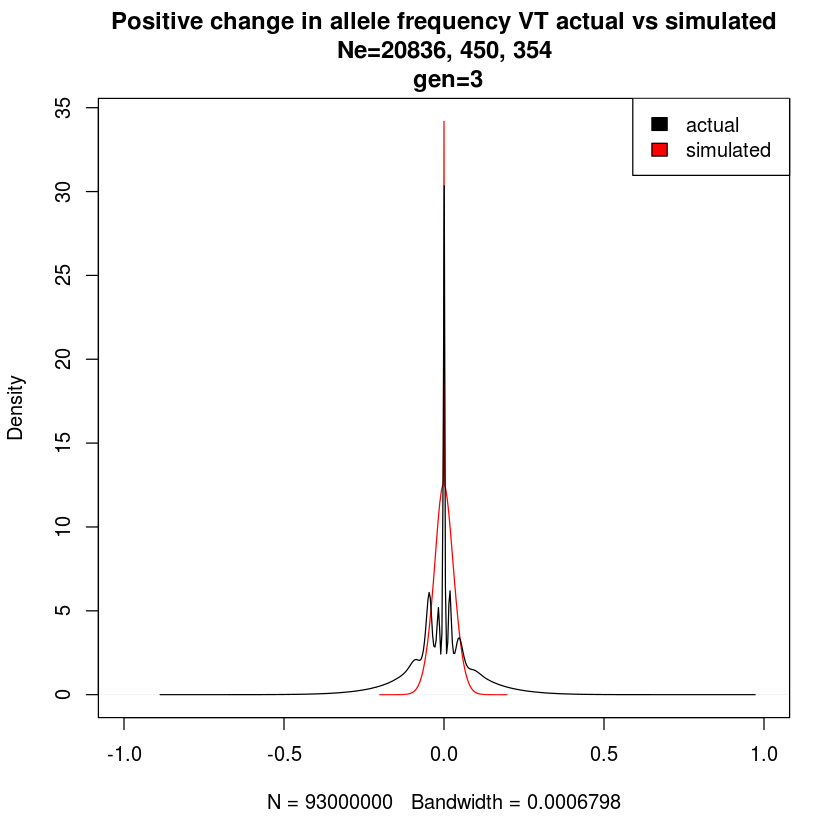

In [15]:
plot(density(vtsim$diff), col="red", main=" Positive change in allele frequency VT actual vs simulated \n Ne=20836, 450, 354 \n gen=3", xlim=c(-1,1))
     lines(density(vteusnpsAllfilt$diff)) 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

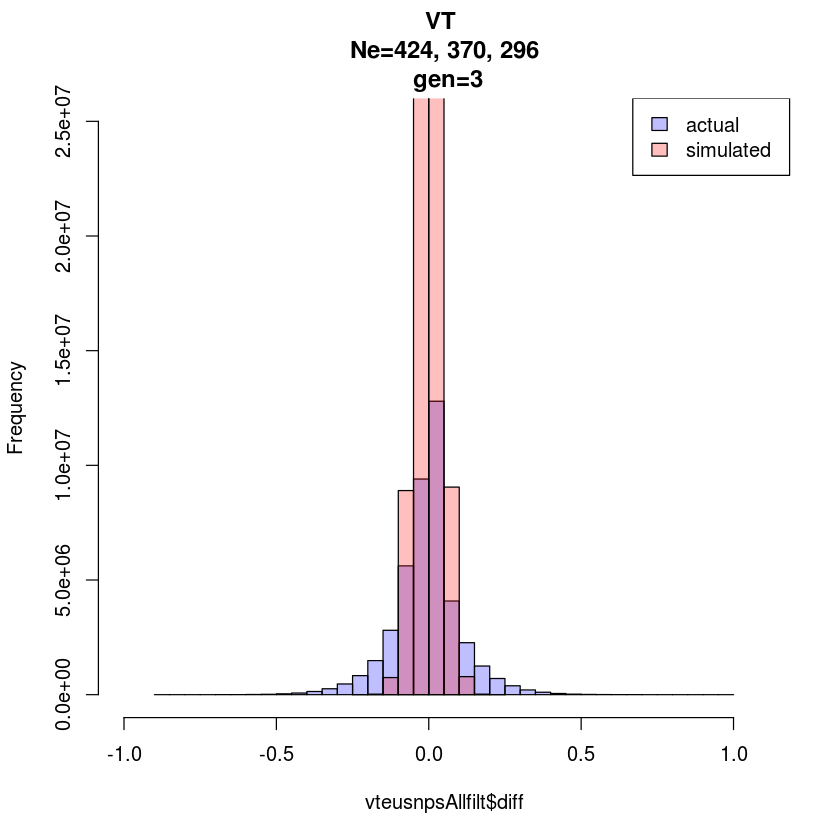

In [33]:
a=hist(vteusnpsAllfilt$diff, plot=F, breaks=30)
s=hist(vtsim$diff, plot=F, breaks=10)
    plot( a, col=rgb(0,0,1,1/4), xlim=c(-1,1.1), ylim=c(0, 2.5e+07), main=c("VT \n Ne=424, 370, 296 \n gen=3") ) 
    plot( s, col=rgb(1,0,0,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

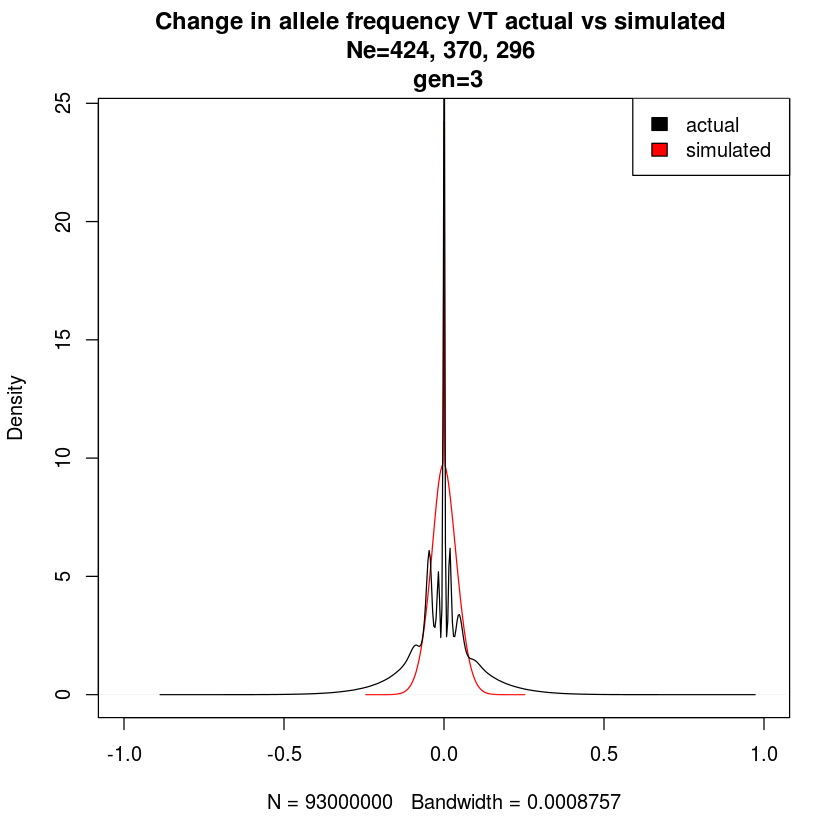

In [18]:
plot(density(vtsim$diff), col="red", main="Change in allele frequency VT actual vs simulated \n Ne=424, 370, 296  \n gen=3", xlim=c(-1,1))
     lines(density(vteusnpsAllfilt$diff)) 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

## 424, 370, 296 

## Plot change in allele frequency

In [59]:
sigSNPS=read.csv("~/WGS/SNPS/All_mylu/snps/NJNYVT40_margCompvaluesNe354.csv", row.names=1)

In [97]:
VTSigS=vteusnpsAll[vteusnpsAll$Scaffold %in% sigSNPS$Scaffold,]
NJSigS=njeusnpsAll[njeusnpsAll$Scaffold %in% sigSNPS$Scaffold,]
NYSigS=nyeusnpsAll[nyeusnpsAll$Scaffold %in% sigSNPS$Scaffold,]

In [98]:
NJNYSigS=merge(NJSigS, NYSigS, by=c("Scaffold", "Position"))

In [99]:
NJNYVTSigS=merge(NJNYSigS, VTSigS, by=c("Scaffold", "Position"))

In [100]:
NJNYVTSigS$diffav=rowMeans(cbind(NJNYVTSigS$diff, NJNYVTSigS$diff.x, NJNYVTSigS$diff.y))

In [101]:
head(NJNYVTSigS$diff)
head(NJNYVTSigS$diff.x)
head(NJNYVTSigS$diff.y)
head(NJNYVTSigS$diffav)

[1] -0.050623 -0.052297  0.003936  0.055307 -0.156307 -0.093754

[1]  0.109715  0.090624 -0.055527 -0.111671  0.039427  0.097373

[1]  0.021936 -0.161271  0.048482 -0.023689  0.000312 -0.028052

[1]  0.027009333 -0.040981333 -0.001036333 -0.026684333 -0.038856000
[6] -0.008144333

In [81]:
(0.003936+ -0.055527+ 0.048482)/3

[1] -0.001036333

In [141]:
sigSNPSsimp=sigSNPS[-c(1, 11),]
sigSNPSsimp2=sigSNPS[-c(2, 11),]

In [115]:
NJNYVTSig=merge(NJNYVTSigS, sigSNPSsimp, by="Scaffold")

In [142]:
NJNYVTSig2=merge(NJNYVTSigS, sigSNPSsimp2, by="Scaffold")

In [116]:
NJNYVTSig$RelPos=NJNYVTSig$Position-NJNYVTSig$SNP

In [143]:
NJNYVTSig2$RelPos=NJNYVTSig2$Position-NJNYVTSig2$SNP

In [117]:
Scaffolds=sigSNPSsimp$Scaffold
Scaffolds

[1] GL429767 GL429769 GL429778 GL429785 GL429813 GL429834 GL429848 GL429849
 [9] GL429852 GL429872 GL429882 GL429966
12 Levels: GL429767 GL429769 GL429778 GL429785 GL429813 GL429834 ... GL429966

In [119]:
NJNYVTSig[NJNYVTSig$Scaffold==Scaffolds[2] & NJNYVTSig$RelPos==0,]

Scaffold,Position,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,Major.y.x,⋯,diffav,NewScaf,SNP,Maj,Min,NJ,NY,VT,Comp,RelPos
GL429769,6378055,1499037,A,G,0.589184,0.589182,0.5835,12,A,⋯,0.5139537,NW_005871050.1,6378055,A,G,9.99999e-07,0.008175992,0.0001809998,5.907905e-10,0


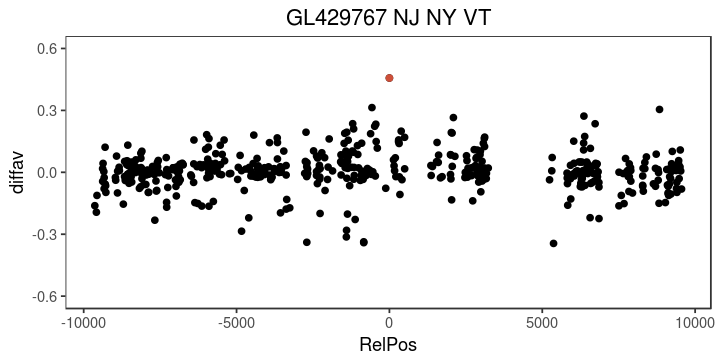

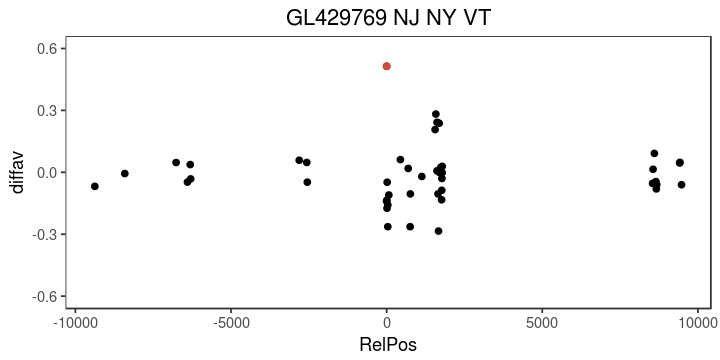

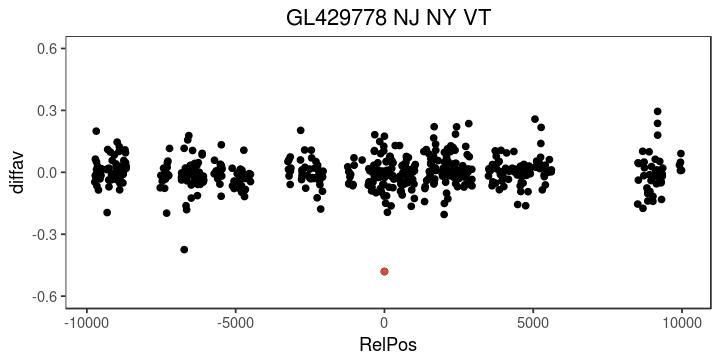

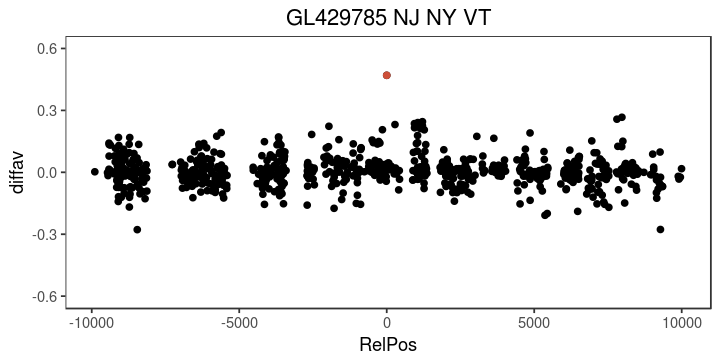

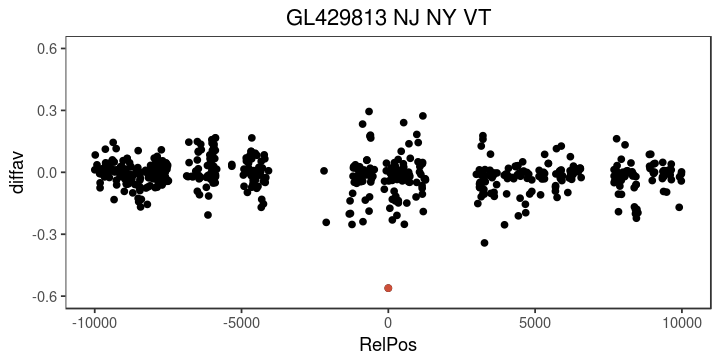

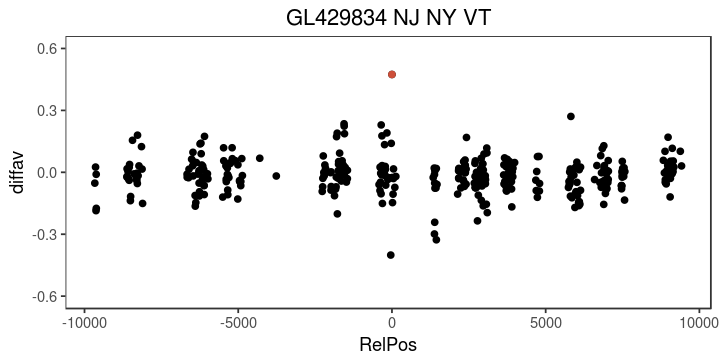

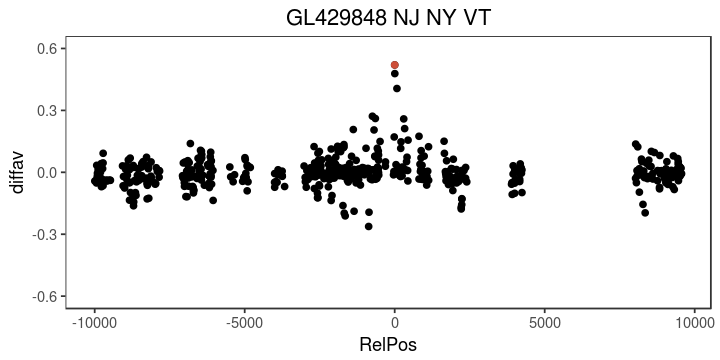

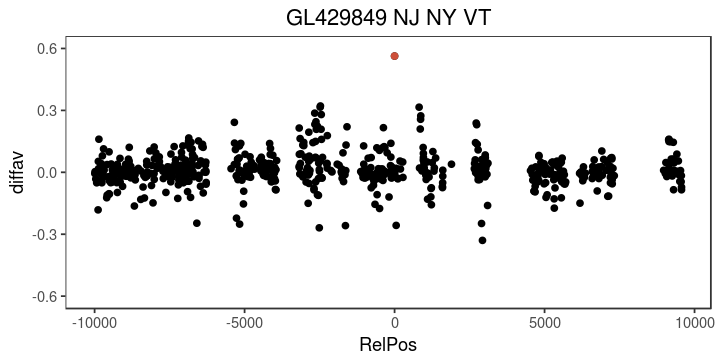

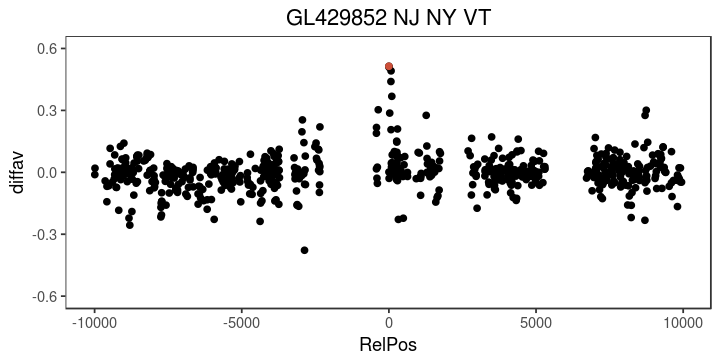

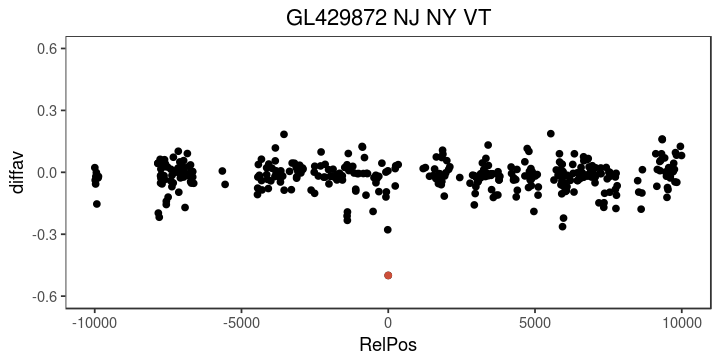

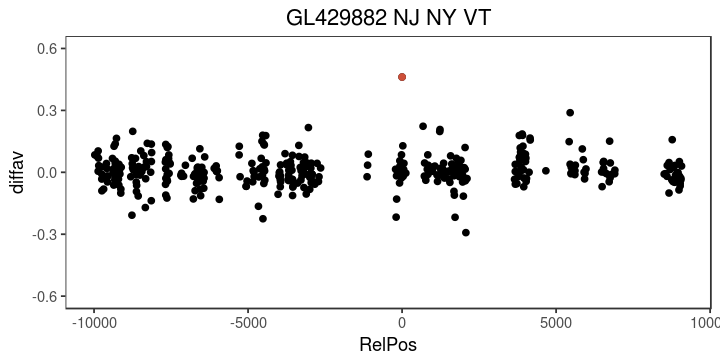

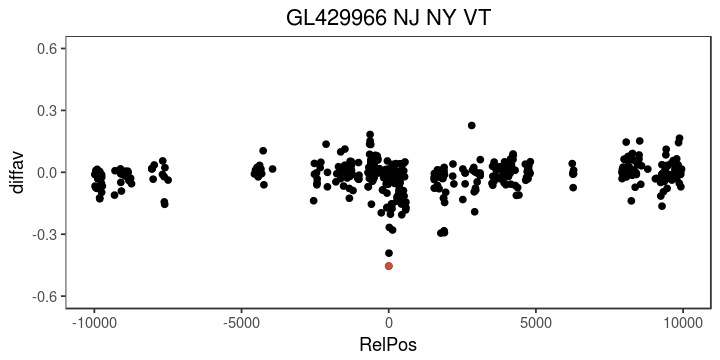

In [129]:
options(repr.plot.width=6, repr.plot.height=3)
for (i in 1:length(Scaffolds)){
all=NJNYVTSig[NJNYVTSig$Scaffold==Scaffolds[i] & NJNYVTSig$RelPos<10000 & NJNYVTSig$RelPos>(-10000),] 
snp=all[all$RelPos==0,] 
    print(ggplot()+ geom_point(data=all, aes(x=RelPos, y=diffav))+ theme_bw()
    + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank())+ ggtitle(paste0(Scaffolds[i]," NJ NY VT"))+theme(plot.title = element_text(hjust = 0.5))
    + geom_point(data=snp, aes(x=RelPos, y=diffav), colour="tomato3")
     + ylim(-0.6, 0.6))
}

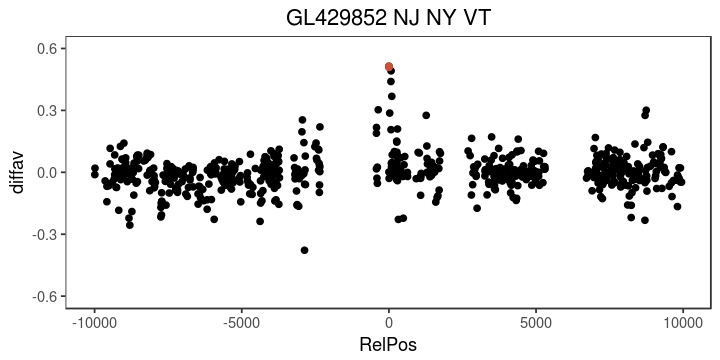

In [144]:
all=NJNYVTSig[NJNYVTSig$Scaffold==Scaffolds[9] & NJNYVTSig$RelPos<10000 & NJNYVTSig$RelPos>(-10000),] 
snp=all[all$RelPos==0|all$RelPos==8,] 
    print(ggplot()+ geom_point(data=all, aes(x=RelPos, y=diffav))+ theme_bw()
    + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank())+ ggtitle(paste0(Scaffolds[9]," NJ NY VT"))+theme(plot.title = element_text(hjust = 0.5))
    + geom_point(data=snp, aes(x=RelPos, y=diffav), colour="tomato3")
     + ylim(-0.6, 0.6))

## Look at snps only changing in NJ and NY

I keep coming back to a few concerns

- Yes, we don't have any evidence that male bats aren't mating at both VT sites but only wintering in the same site year after year, but it seems unlikely that they would do this and then consistently return to the site they were banded at. 

- If we are going to state that NJ and NY, which are 80 miles apart, are independent sites (important for getting p values) because we have not found a significant (greater than 1 or two every few years, and none of our NJ sampled bats) portion of banded bats from the other site, then I think it will be tricky to also claim that the two VT sites, which are 40 miles apart, are one. Theoretically, if male bats are mating at two sites but only wintering at one, this could be happening in NY and NJ. 

I want to avoid a scenario where there are significant differences in alelle freqs between the two VT sites pre-wns that end up looking like changes in allele freqs over time, but aren't actually.  In reality, this would just cause us to unnecessarily reduce our list of snps with high changes in allele freq in NJ and NY unnecessarily based on false criteria and miss producing a list of snps that are actually changing in three populations, focusing on NJ and NY as our criteria for filtering snps would therefore be the more conservative choice. 



In [13]:
head(njnyeusnpsfilt)

Scaffold,Position,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,Major.y.x,⋯,Maf3_E.y,nInd_E.y,Major.y.y,Minor.y.y,Maf1_U.y,Maf2_U.y,Maf3_U.y,nInd_U.y,diff.y,nInd.y
AAPE02055386,114905,8,A,G,0.168444,0.168444,0.180239,16,A,⋯,0.068905,11,A,G,0.000000,0.000006,0.000000,7,0.062144,4
AAPE02055386,116147,11,G,A,0.049599,0.016487,0.055080,13,G,⋯,0.000000,10,G,A,0.000000,0.000002,0.000000,13,0.000002,3
AAPE02055386,116157,12,T,C,0.050392,0.048688,0.031321,13,T,⋯,0.091136,12,T,C,0.000000,0.000002,0.000000,13,0.023424,1
AAPE02055386,116325,14,C,A,0.385368,0.385371,0.336211,10,C,⋯,0.384384,11,C,A,0.360023,0.360022,0.367551,12,0.067260,1
AAPE02055947,107430,17,G,A,0.066339,0.062552,0.029594,10,G,⋯,0.043864,17,G,A,0.000000,0.000004,0.000000,9,0.089949,8
AAPE02055947,107437,18,T,C,0.391269,0.390130,0.316088,10,T,⋯,0.421226,17,T,C,0.431215,0.431208,0.469636,9,0.024045,8


In [19]:
njnyeusnps50=njnyeusnpsfilt[njnyeusnpsfilt$diff.x>0.50& njnyeusnpsfilt$diff.y>0.50,]
njnyeuneg50=njnyeunegfilt[njnyeunegfilt$diff.x<(-0.50)& njnyeunegfilt$diff.y<(-0.50),]

In [20]:
NROW(njnyeusnps50)
NROW(njnyeuneg50)

[1] 221

[1] 241

In [21]:
njnyeusnps50All=rbind(njnyeuneg50, njnyeusnps50)

In [18]:
NROW(njnyeusnps48)
NROW(njnyeuneg48)

[1] 384

[1] 430

In [18]:
write.csv(njnyeusnps50All, file="~/WGS/SNPS/All_mylu/snps/njnyeu50.csv")

In [13]:
njnyeusnps50All=read.csv("~/WGS/SNPS/All_mylu/snps/njnyeu50.csv")

In [15]:
njnyeusnps50All$V1.x=NULL

In [17]:
colnames(njnyeusnps50All)=c( 'V1', 'Scaffold', 'Position', 'Major', 'Minor', 'Maf1_E', 'Maf2_E', 'Maf3_E', 'nInd_E', 'Major.y', 'Minor.y', 'Maf1_U', 'Maf2_U', 'Maf3_U', 'nInd_U', 'diff', 'nInd')
head(njnyeusnps50All)

V1,Scaffold,Position,Major,Minor,Maf1_E,Maf2_E,Maf3_E,nInd_E,Major.y,⋯,NA,NA.1,NA.2,NA.3,NA.4,NA.5,NA.6,NA.7,NA.8,NA.9
1,GL429767,4479568,G,T,0.145681,0.145682,0.163082,13,G,⋯,0.222771,11,G,T,0.590248,0.590241,0.598411,16,-0.515986,5
2,GL429767,4550108,T,C,0.234004,0.234005,0.251118,14,T,⋯,0.123008,11,T,C,0.659115,0.659116,0.656050,13,-0.526435,2
3,GL429767,16839644,T,A,0.137273,0.047404,0.145505,10,T,⋯,0.242342,10,T,A,0.925567,0.925564,0.943745,9,-0.705524,1
4,GL429767,33884819,A,C,0.224189,0.224189,0.265346,14,A,⋯,0.275169,8,A,C,0.627568,0.627566,0.626921,11,-0.542893,3
5,GL429767,46534125,C,T,0.140358,0.140358,0.159855,15,C,⋯,0.000000,10,C,T,0.574615,0.574615,0.567234,15,-0.574613,5
6,GL429767,52446764,T,C,0.177801,0.177800,0.178730,12,T,⋯,0.175230,11,T,C,0.596921,0.596915,0.626487,16,-0.548588,5


## Look at snps that are changing just in 1 population

I could do:
Everything above 0.9

Evertying above 0.8?

Everything above a lower theshold that is on a scaffold found in our significant across all three? (shoudl this be only the truly significant ones or all of them?)

I could just literally run everything above 0.5 and then look for significant snps...but would take a while, and this is still possibly problematic. 



Can you filter them ahead of time. using number of individuals and maybe also ones where the 2 mafs agree?
Maybe you should actually use a different maf estimator...

In [26]:
njeu80=njeusnpsfilt[njeusnpsfilt$diff>0.8,]
nyeu80=nyeusnpsfilt[nyeusnpsfilt$diff>0.8,]
vteu80=vteusnpsfilt[vteusnpsfilt$diff>0.8,]
njeun80=njeunegfilt[njeunegfilt$diff<(-0.8),]
nyeun80=nyeunegfilt[nyeunegfilt$diff<(-0.8),]
vteun80=vteunegfilt[vteunegfilt$diff<(-0.8),]

In [40]:
NROW(njeun80)

[1] 250

In [49]:
NROW(njeu80)
NROW(nyeu80)
NROW(vteu80)
NROW(njeun80)
NROW(nyeun80)
NROW(vteun80)

[1] 63

[1] 129

[1] 21

[1] 250

[1] 98

[1] 33

In [50]:
63+129+21+250+98+33

[1] 594

In [58]:
njeuAll80=rbind(njeu80, njeun80)
nyeuAll80=rbind(nyeu80, nyeun80)
vteuAll80=rbind(vteu80, vteun80)

In [10]:
njeuAll80$X=NULL
nyeuAll80$X=NULL
vteuAll80$X=NULL

In [11]:
colnames(njeuAll80)=c( 'V1', 'Scaffold', 'Position', 'Major', 'Minor', 'Maf1_E', 'Maf2_E', 'Maf3_E', 'nInd_E', 'Major.y', 'Minor.y', 'Maf1_U', 'Maf2_U', 'Maf3_U', 'nInd_U', 'diff', 'nInd')
colnames(nyeuAll80)=c('V1', 'Scaffold', 'Position', 'Major', 'Minor', 'Maf1_E', 'Maf2_E', 'Maf3_E', 'nInd_E', 'Major.y', 'Minor.y', 'Maf1_U', 'Maf2_U', 'Maf3_U', 'nInd_U', 'diff', 'nInd')
colnames(vteuAll80)=c( 'V1', 'Scaffold', 'Position', 'Major', 'Minor', 'Maf1_E', 'Maf2_E', 'Maf3_E', 'nInd_E', 'Major.y', 'Minor.y', 'Maf1_U', 'Maf2_U', 'Maf3_U', 'nInd_U', 'diff', 'nInd')

In [4]:
njeuAll80=read.csv("~/WGS/SNPS/All_mylu/snps/njeu80.csv")
nyeuAll80=read.csv("~/WGS/SNPS/All_mylu/snps/nyeu80.csv")
vteuAll80=read.csv("~/WGS/SNPS/All_mylu/snps/vteu80.csv")

In [12]:
write.csv(njeuAll80, file="~/WGS/SNPS/All_mylu/snps/njeu80.csv")
write.csv(nyeuAll80, file="~/WGS/SNPS/All_mylu/snps/nyeu80.csv")
write.csv(vteuAll80, file="~/WGS/SNPS/All_mylu/snps/vteu80.csv")

In [5]:
njvteu40=merge(njeu40, vteu40, by=c("Scaffold", "Position"))
njnyvteu40=merge(njvteu40, nyeu40, by=c("Scaffold", "Position"))
NROW(njnyvteu40)

[1] 39

In [8]:
write.csv(njnyvteu40, file="~/WGS/SNPS/All_mylu/snps/njnyvteu40.csv")

In [6]:
njnyvteu40dupes=njnyvteu40[njnyvteu40$Scaffold %in% njnyvteu40$Scaffold[duplicated(njnyvteu40$Scaffold)],]

In [7]:
njnyvteu40dupes

Scaffold,Position,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,Major.y.x,⋯,Maf2_E,Maf3_E,nInd_E,Major.y,Minor.y,Maf1_U,Maf2_U,Maf3_U,nInd_U,diff
GL429767,10265656,225945,T,C,0.843202,0.843202,0.833381,15,T,⋯,0.708026,0.732224,11,T,C,0.260631,0.260634,0.244548,13,0.447392
GL429767,39819883,600380,G,C,0.566047,0.566044,0.555731,15,G,⋯,0.488130,0.469819,13,G,C,0.152466,0.056189,0.159319,11,0.431941
GL429768,4318783,1013835,C,T,0.759476,0.759475,0.741288,15,C,⋯,0.635064,0.614687,12,C,T,0.143789,0.143787,0.149299,12,0.491277
GL429768,11968353,1125438,T,C,0.719161,0.719157,0.724949,15,T,⋯,0.635200,0.610357,14,T,C,0.203301,0.203304,0.134005,13,0.431896
GL429785,7341092,4842257,T,G,0.460767,0.460765,0.479746,16,T,⋯,0.698873,0.667001,8,T,G,0.233027,0.233030,0.173951,11,0.465843
GL429785,11292450,4896243,G,A,0.532096,0.532098,0.521239,11,G,⋯,0.514216,0.518285,11,G,A,0.113668,0.113668,0.124248,13,0.400548
GL429848,2603829,10639750,T,C,0.769942,0.769944,0.755288,17,T,⋯,0.730515,0.714715,10,T,C,0.200311,0.200315,0.158075,15,0.530200
GL429848,2603833,10639751,G,A,0.681770,0.681772,0.670903,17,G,⋯,0.683366,0.676028,11,G,A,0.200414,0.200418,0.173576,15,0.482948
GL429852,463033,10864262,G,A,0.712987,0.712990,0.698510,14,G,⋯,0.835608,0.808837,10,G,A,0.209286,0.208652,0.213713,13,0.626956
GL429852,463041,10864263,G,A,0.711730,0.711733,0.697364,14,G,⋯,0.835610,0.808837,10,G,A,0.261612,0.261620,0.240861,13,0.573990


In [9]:
njvteun40=merge(njeun40, vteun40, by=c("Scaffold", "Position"))
njnyvteun40=merge(njvteun40, nyeun40, by=c("Scaffold", "Position"))
NROW(njnyvteun40)

[1] 54

In [10]:
njnyvteu40abs=rbind(njnyvteu40, njnyvteun40)

In [16]:
njnyvteu40abs$V1.x=NULL

In [18]:
njnyvteu40abs=njnyvteu40abs[order(Scaffold),] 

In [19]:
write.table(njnyvteu40abs, file="~/WGS/SNPS/All_mylu/snps/njnyvteu40.txt", sep="\t", row.names=FALSE)

In [125]:
njnyvteun40dupes=njnyvteun40[njnyvteun40$Scaffold %in% njnyvteun40$Scaffold[duplicated(njnyvteun40$Scaffold)],]

In [127]:
njnyvteun40dupes

Scaffold,Position,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,Major.y.x,Minor.y.x,⋯,Maf2_E,Maf3_E,nInd_E,Major.y,Minor.y,Maf1_U,Maf2_U,Maf3_U,nInd_U,diff
GL429767,24450613,T,A,0.391122,0.139307,0.382578,7,T,A,⋯,0.052677,0.183578,11,T,A,0.454501,0.454502,0.424181,14,-0.401825
GL429767,35761989,A,G,0.399672,0.399679,0.383488,14,A,G,⋯,0.000005,0.000000,9,A,G,0.539826,0.539828,0.536987,8,-0.539823
GL429767,45231339,T,G,0.157642,0.157648,0.152617,18,T,G,⋯,0.112390,0.332145,11,T,G,0.634642,0.634637,0.641243,10,-0.522247
GL429767,56161793,A,G,0.113784,0.113787,0.132387,14,A,G,⋯,0.278631,0.254968,13,A,G,0.685945,0.685944,0.648649,15,-0.407313
GL429767,56933899,C,A,0.262850,0.262858,0.257121,13,C,A,⋯,0.510932,0.511233,13,C,A,0.924084,0.924081,0.958059,9,-0.413149
GL429778,11429827,G,A,0.109475,0.109028,0.101139,13,G,A,⋯,0.025994,0.041336,10,G,A,0.532094,0.532085,0.536916,13,-0.506091
GL429778,12336014,G,C,0.150362,0.149942,0.151976,11,G,C,⋯,0.287926,0.310626,11,G,C,0.875592,0.875591,0.870589,12,-0.587665
GL429831,2610488,C,G,0.168082,0.168087,0.167119,16,C,G,⋯,0.259934,0.275320,15,C,G,0.796073,0.796069,0.802006,11,-0.536135
GL429831,2755974,A,C,0.050583,0.017246,0.037537,13,A,C,⋯,0.023305,0.096415,12,A,C,0.503407,0.503401,0.508492,8,-0.480096
GL429992,204614,C,A,0.108448,0.033572,0.115510,14,C,A,⋯,0.047138,0.170072,11,C,A,0.531833,0.531832,0.597928,16,-0.484694


In [128]:
poschr=njnyvteu40dupes$Scaffold
negchr=njnyvteun40dupes$Scaffold

In [129]:
poschr=as.data.frame(poschr)
negchr=as.data.frame(negchr)
colnames(poschr)="Scaffold"
colnames(negchr)="Scaffold"

In [130]:
njnyvteuposchr=merge(poschr, njnyvteu, by="Scaffold") 
njnyvteunegchr=merge(negchr, njnyvteu, by="Scaffold") 

In [131]:
neg40=as.data.frame(cbind(njnyvteunegchr$Scaffold, njnyvteunegchr$Position, njnyvteunegchr$diffav))
colnames(neg40)=c("Scaf", "BP", "P")
neg40$CHR=as.numeric(neg40$Scaf)


In [132]:
neg40$BP=as.numeric(neg40$BP)
neg40$P=as.numeric(neg40$P)
neg40$Scaf=NULL

Warning message in manhattan(neg40, ylim = c(-1, 1), logp = FALSE):
“No SNP column found. OK unless you're trying to highlight.”

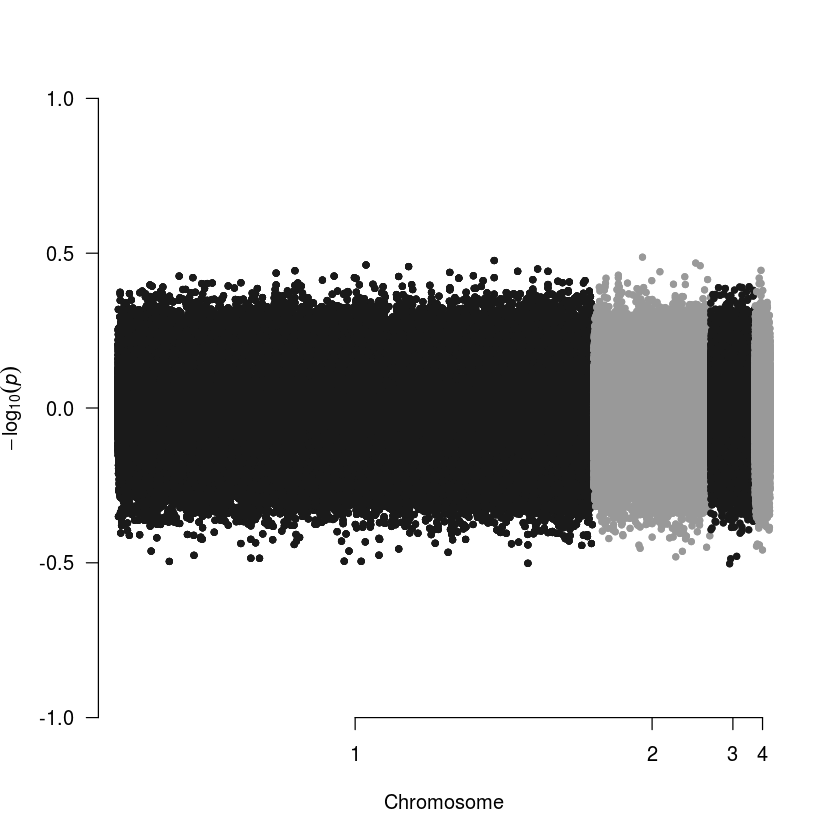

In [133]:
manhattan(neg40, ylim=c(-1,1), logp=FALSE)

Warning message in manhattan(subset(neg40, CHR == 1), ylim = c(-1, 1), logp = FALSE):
“No SNP column found. OK unless you're trying to highlight.”

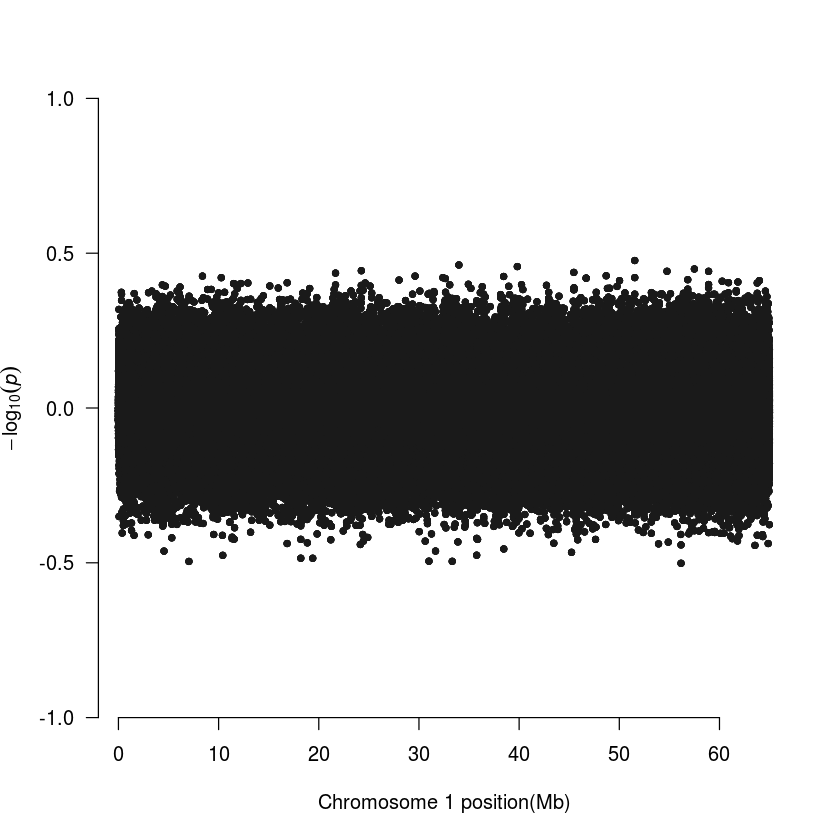

In [141]:
manhattan(subset(neg40, CHR ==1), ylim=c(-1,1), logp=FALSE)

Warning message in manhattan(subset(neg40, CHR == 3), ylim = c(-1, 1), logp = FALSE):
“No SNP column found. OK unless you're trying to highlight.”

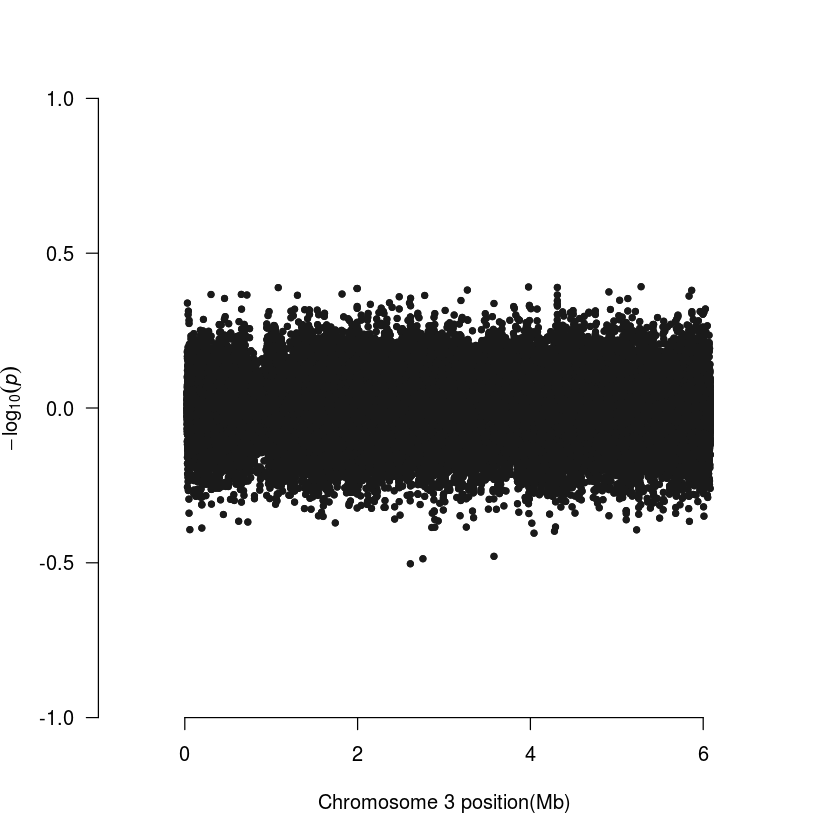

In [140]:
manhattan(subset(neg40, CHR ==3), ylim=c(-1,1), logp=FALSE)

In [134]:
pos40=as.data.frame(cbind(njnyvteuposchr$Scaffold, njnyvteuposchr$Position, njnyvteuposchr$diffav))
colnames(pos40)=c("Scaf", "BP", "P")
pos40$CHR=as.numeric(pos40$Scaf)
pos40$BP=as.numeric(pos40$BP)
pos40$P=as.numeric(pos40$P)
pos40$Scaf=NULL


Warning message in manhattan(pos40, ylim = c(-1, 1), logp = FALSE):
“No SNP column found. OK unless you're trying to highlight.”

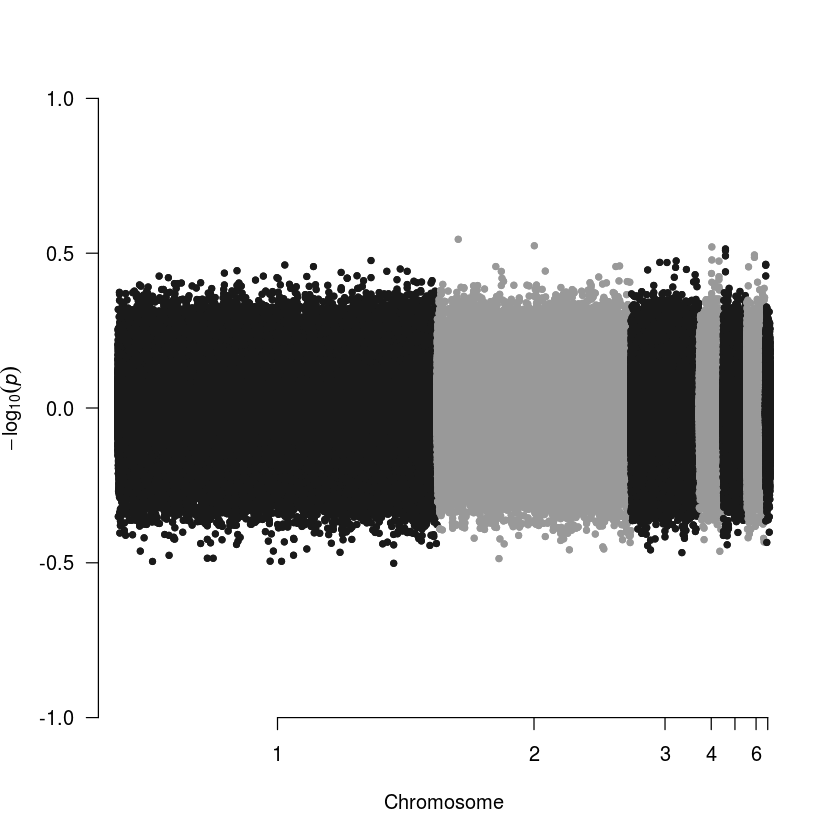

In [135]:
manhattan(pos40, ylim=c(-1,1), logp=FALSE)

Warning message in manhattan(subset(pos40, CHR == 4), ylim = c(-1, 1), logp = FALSE):
“No SNP column found. OK unless you're trying to highlight.”

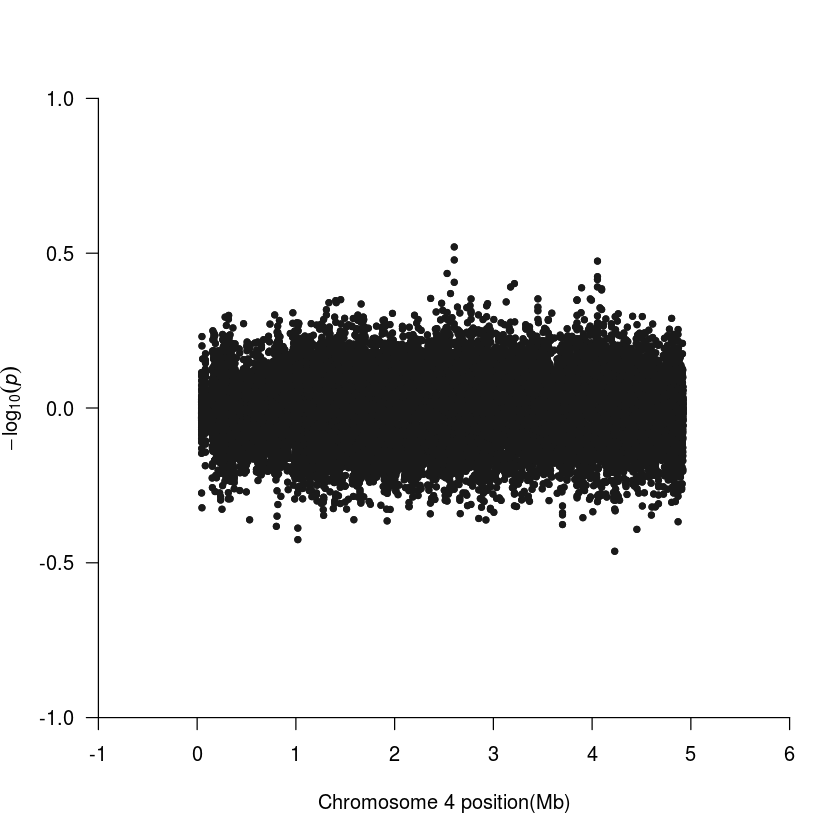

In [136]:
manhattan(subset(pos40, CHR ==4), ylim=c(-1,1), logp=FALSE)

Look at changes in linkage disequeilibrium from pre to post. Also changes in diversity. 

Warning message in manhattan(subset(pos40, CHR == 5), ylim = c(-1, 1), logp = FALSE):
“No SNP column found. OK unless you're trying to highlight.”

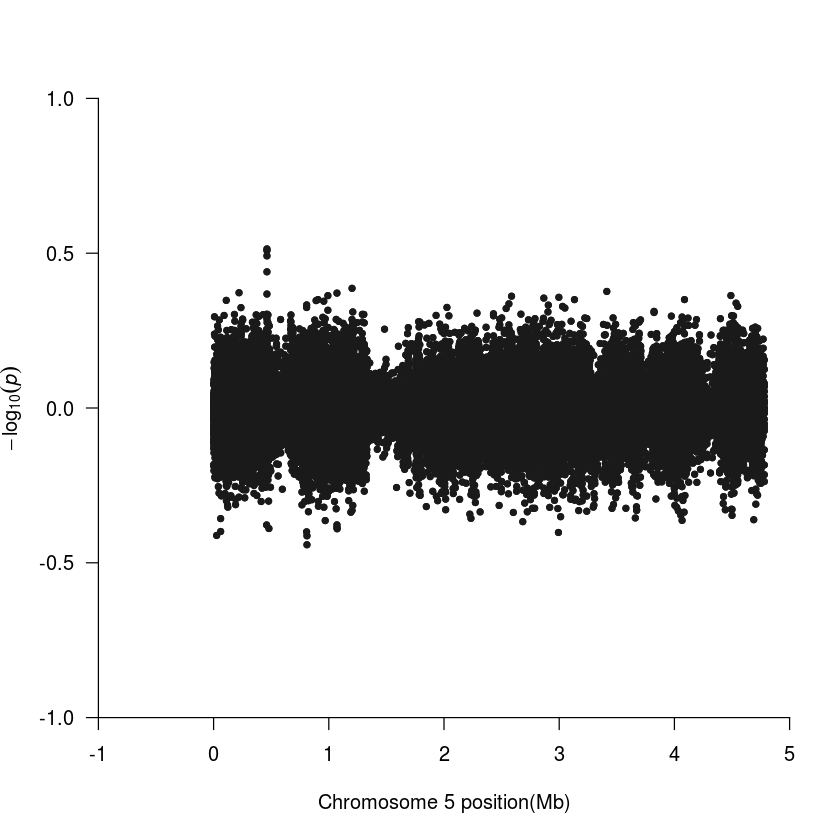

In [137]:
manhattan(subset(pos40, CHR ==5), ylim=c(-1,1), logp=FALSE)

Warning message in manhattan(subset(pos40, CHR == 6), ylim = c(-1, 1), logp = FALSE):
“No SNP column found. OK unless you're trying to highlight.”

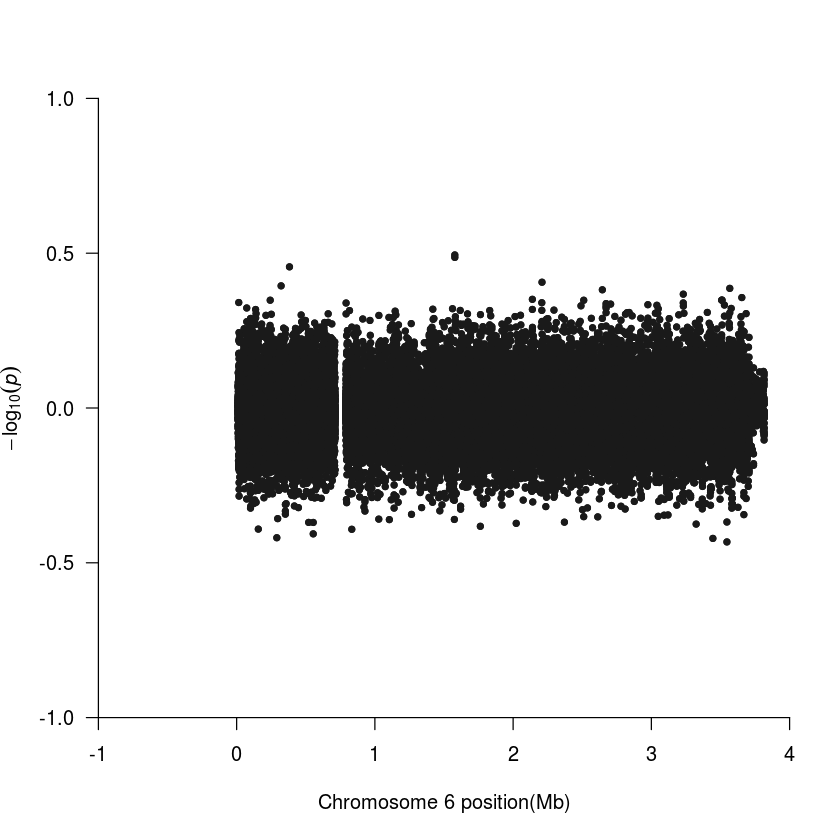

In [138]:
manhattan(subset(pos40, CHR ==6), ylim=c(-1,1), logp=FALSE)